# Importing libraries

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
import matplotlib as mpl
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


# Loading the dataset

In [ ]:
#Loading the dataset
data = pd.read_csv("/gdrive/My Drive/DASA/final_dataset_eur_without_outliers.csv")
data = data.drop(columns = ["Unnamed: 0"])
print("Number of datapoints:", len(data))

Number of datapoints: 30632


In [ ]:
original_data = data.copy()

# Data Visualization
Focus on NPK, Rainfall and Average Temperature that are the features important for clustering

In [ ]:
data = data[['N_min','N_max','P_min','P_max','K_min','K_max',"Avg_Temp", "Rainfall", "Crop"]]
data

N_min  N_max  P_min  P_max  K_min  K_max   Avg_Temp  Rainfall  \
0         79    100     28     40     79    140  28.236667   1189.48   
1         79    100     28     40     79    140  28.294583    887.11   
2         79    100     28     40     79    140  28.545833    788.69   
3         79    100     28     40     79    140  28.487500    805.96   
4         79    100     28     40     79    140  28.289167   1822.37   
...      ...    ...    ...    ...    ...    ...        ...       ...   
30627     90    100     10     15     45     50  27.330417    815.89   
30628     90    100     10     15     45     50  27.190833   1323.06   
30629     90    100     10     15     45     50  27.066250   2632.85   
30630     90    100     10     15     45     50  27.972083    575.07   
30631     90    100     10     15     45     50  27.165833    882.21   

                 Crop  
0            Arecanut  
1            Arecanut  
2            Arecanut  
3            Arecanut  
4            Arecanut  
...               ...  
30627  other oilseeds  
30628  other oilseeds  
30629  other oilseeds  
30630  other oilseeds  
30631  other oilseeds  

[30632 rows x 9 columns]

In [ ]:
data.describe()

N_min         N_max         P_min         P_max         K_min  \
count  30632.000000  30632.000000  30632.000000  30632.000000  30632.000000   
mean      69.079068    165.353846     48.279479     77.556934     71.689247   
std       55.556031    122.934628     21.572683     42.334731     68.540825   
min        8.000000     10.000000      5.000000      8.000000      0.000000   
25%       25.000000     60.000000     28.000000     45.000000     30.000000   
50%       60.000000    100.000000     50.000000     67.000000     60.000000   
75%      105.000000    303.000000     60.000000     95.000000     75.000000   
max      200.000000    400.000000    110.000000    250.000000    515.000000   

              K_max      Avg_Temp      Rainfall  
count  30632.000000  30632.000000  30632.000000  
mean     166.556052     26.084822   1178.790085  
std      153.449917      1.233055    681.794662  
min       20.000000     20.491667     34.240000  
25%       60.000000     25.315521    755.730000  
50%      120.000000     26.077500   1013.600000  
75%      220.000000     26.800833   1357.330000  
max      520.000000     29.852083   5505.020000

In [ ]:
print("The total number of crops is:\n{}".format(data["Crop"].nunique()))

The total number of crops is:
60


In [ ]:
distinct_crops = data["Crop"].value_counts()
print("The distribution for each crop is:\n{}".format(distinct_crops))

The distribution for each crop is:
Sugarcane                    3665
Onion                        2538
Potato                       2374
Dry chillies                 2330
Turmeric                     2120
Sweet potato                 2034
Garlic                       1850
Coriander                    1835
Banana                       1773
Tobacco                      1213
Dry ginger                    831
Arecanut                      830
Tapioca                       769
Guar seed                     539
Cashewnut                     526
Sesamum                       491
Black pepper                  453
Mango                         234
Papaya                        232
Cotton(lint)                  212
Cardamom                      194
Pome Fruit                    189
Citrus Fruit                  184
Tomato                        179
Brinjal                       157
Sunflower                     150
Groundnut                     148
Arhar/Tur                     141
Bhindi       

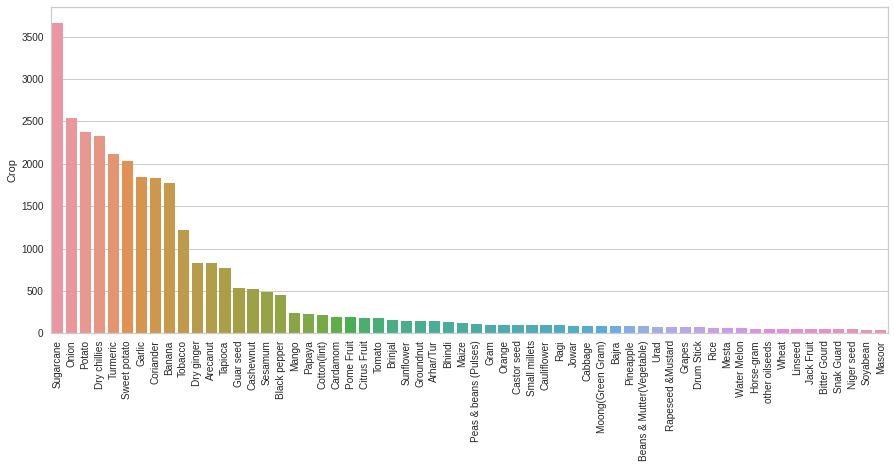

In [ ]:
crops = pd.DataFrame(distinct_crops)
plt.figure(figsize = (15, 6))
sns.barplot(y ='Crop', x = crops.index, data = crops)
plt.xticks(rotation = 90)
plt.show()

Reletive Plot of All the Features


<Figure size 576x396 with 0 Axes>

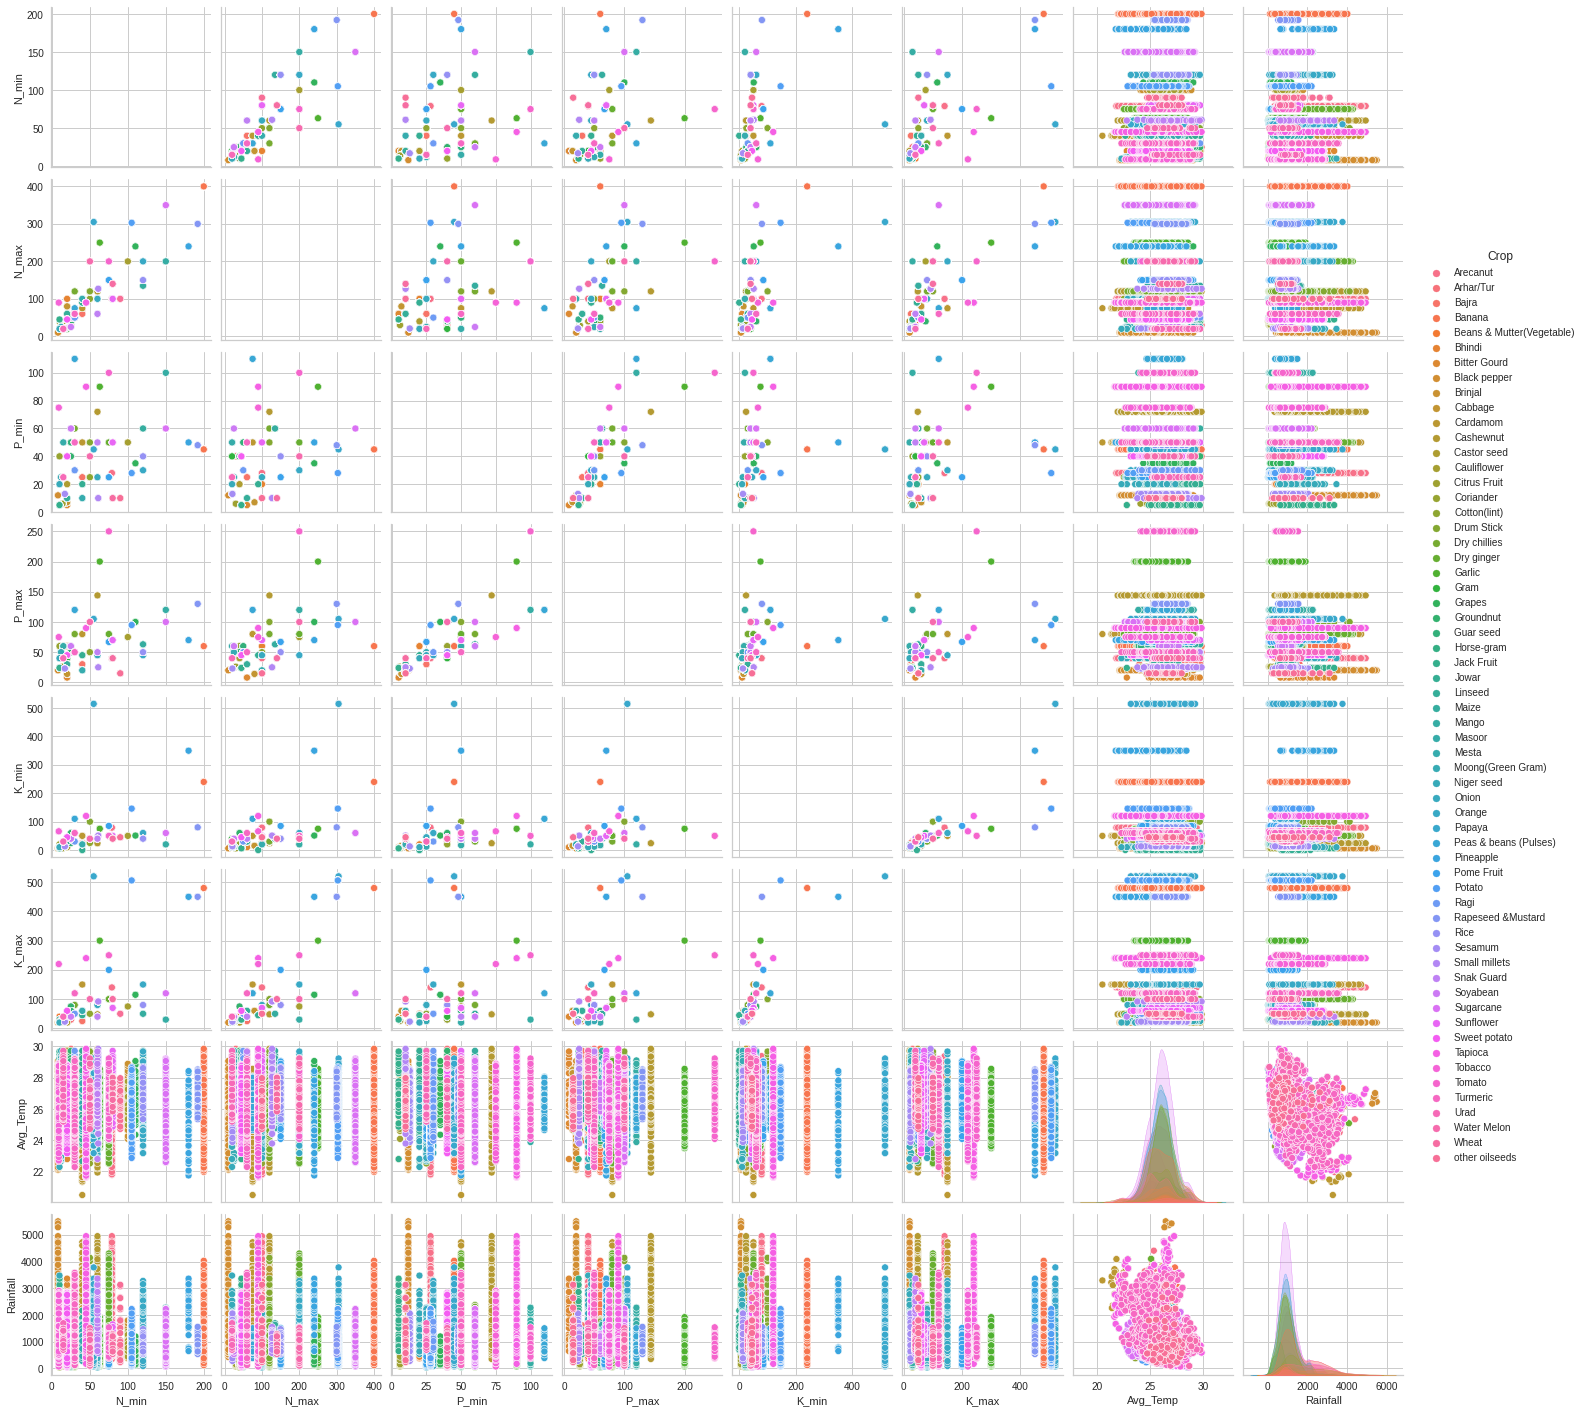

In [ ]:
print("Reletive Plot of All the Features")
plt.figure()
sns.pairplot(data, hue = "Crop")
plt.show()

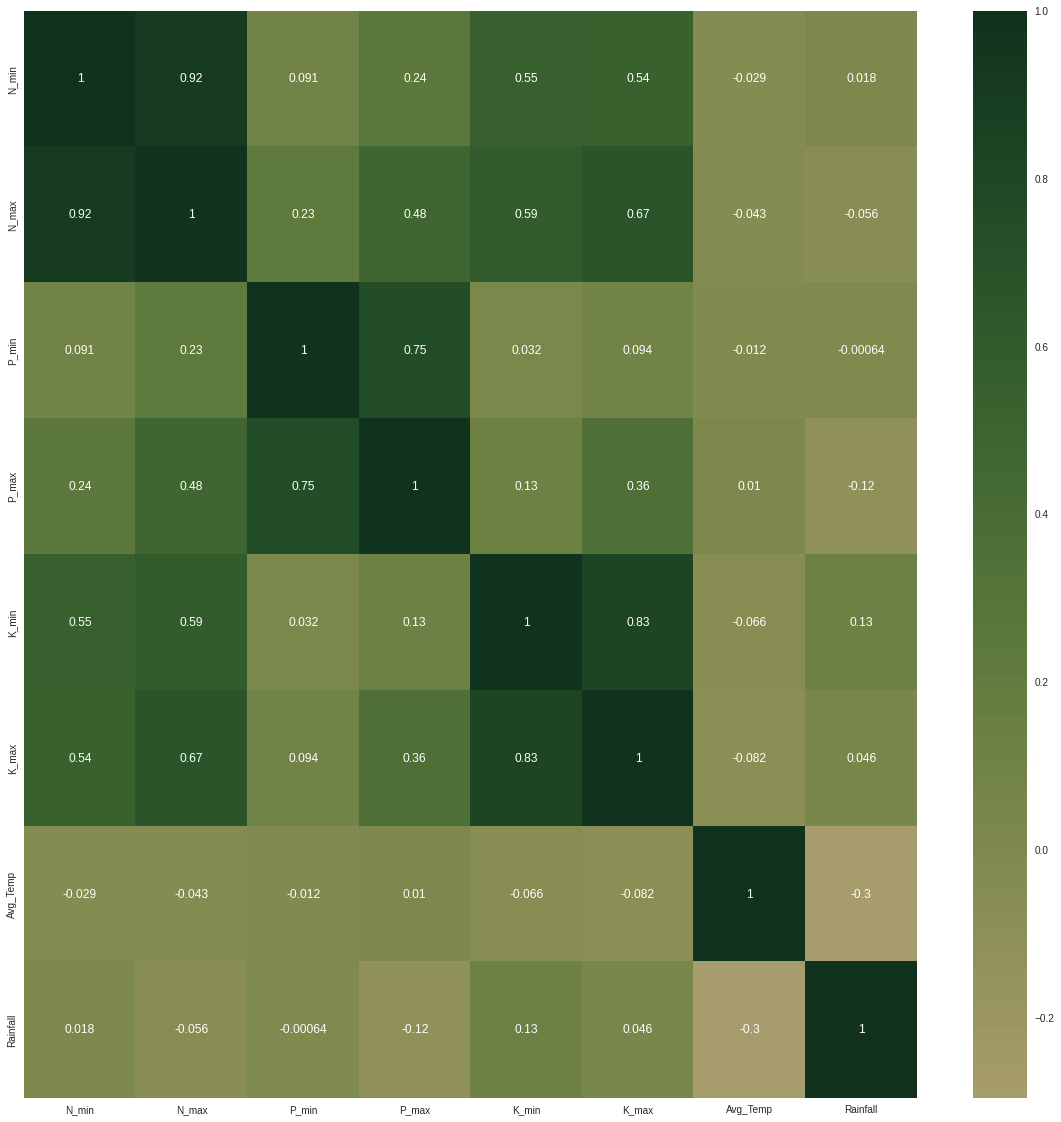

In [ ]:
cmap = sns.color_palette("ch: start = -.7 , rot = -.5", as_cmap = True)
corrmat = data.corr()
plt.figure(figsize = (20, 20))  
sns.heatmap(corrmat, annot = True, cmap = cmap, center = 0)

The correlation matrix shows that only NPK min/max values are correlated between each other as it can be since this information came from the literature

# Data Pre Processing

## Normalization of the data
Using MaxAbsScaler

In [ ]:
ds = data.copy()
ds = ds.drop(columns = ["Crop"])
scaler = MaxAbsScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns = ds.columns)
scaled_ds

N_min  N_max     P_min  P_max     K_min     K_max  Avg_Temp  Rainfall
0      0.395   0.25  0.254545   0.16  0.153398  0.269231  0.945886  0.216072
1      0.395   0.25  0.254545   0.16  0.153398  0.269231  0.947826  0.161146
2      0.395   0.25  0.254545   0.16  0.153398  0.269231  0.956243  0.143267
3      0.395   0.25  0.254545   0.16  0.153398  0.269231  0.954289  0.146405
4      0.395   0.25  0.254545   0.16  0.153398  0.269231  0.947645  0.331038
...      ...    ...       ...    ...       ...       ...       ...       ...
30627  0.450   0.25  0.090909   0.06  0.087379  0.096154  0.915528  0.148208
30628  0.450   0.25  0.090909   0.06  0.087379  0.096154  0.910852  0.240337
30629  0.450   0.25  0.090909   0.06  0.087379  0.096154  0.906679  0.478263
30630  0.450   0.25  0.090909   0.06  0.087379  0.096154  0.937023  0.104463
30631  0.450   0.25  0.090909   0.06  0.087379  0.096154  0.910015  0.160256

[30632 rows x 8 columns]

In [ ]:
scaled_ds.describe()

N_min         N_max         P_min         P_max         K_min  \
count  30632.000000  30632.000000  30632.000000  30632.000000  30632.000000   
mean       0.345395      0.413385      0.438904      0.310228      0.139202   
std        0.277780      0.307337      0.196115      0.169339      0.133089   
min        0.040000      0.025000      0.045455      0.032000      0.000000   
25%        0.125000      0.150000      0.254545      0.180000      0.058252   
50%        0.300000      0.250000      0.454545      0.268000      0.116505   
75%        0.525000      0.757500      0.545455      0.380000      0.145631   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              K_max      Avg_Temp      Rainfall  
count  30632.000000  30632.000000  30632.000000  
mean       0.320300      0.873802      0.214130  
std        0.295096      0.041305      0.123850  
min        0.038462      0.686440      0.006220  
25%        0.115385      0.848032      0.137280  
50%        0.230769      0.873557      0.184123  
75%        0.423077      0.897788      0.246562  
max        1.000000      1.000000      1.000000

## Dimensionality Reduction
Using PCA: 
> "Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss"


In [ ]:
scaled_ds_for_PCA = scaled_ds.copy()

Initiating PCA to reduce dimentions aka features to 3


In [ ]:
pca = PCA(n_components = 3)
pca.fit(scaled_ds_for_PCA)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds_for_PCA), columns = (["col1", "col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  30632.0  0.000000e+00  0.476443 -0.642811 -0.333390 -0.201310  0.472978   
col2  30632.0  4.453650e-17  0.235122 -0.407119 -0.200862 -0.010111  0.119408   
col3  30632.0  4.453650e-17  0.213721 -0.424023 -0.093682  0.005893  0.100948   

           max  
col1  1.066649  
col2  0.738429  
col3  0.693304

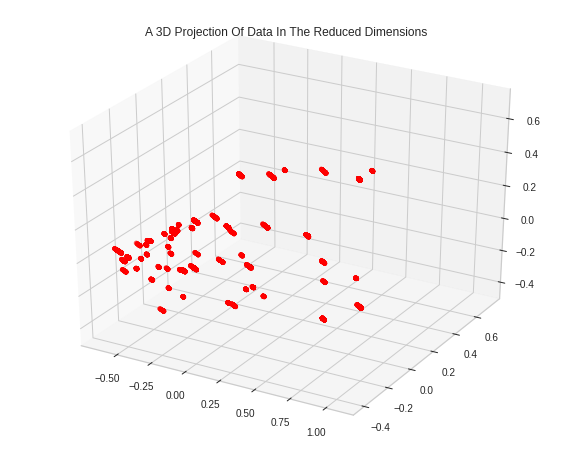

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x_pca = PCA_ds["col1"]
y_pca = PCA_ds["col2"]
z_pca = PCA_ds["col3"]
#To plot
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x_pca, y_pca, z_pca, c = "red", marker = "o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimensions")
plt.show()

# Clustering with PCA

## Elbow method

Elbow Method to determine the number of clusters to be formed:


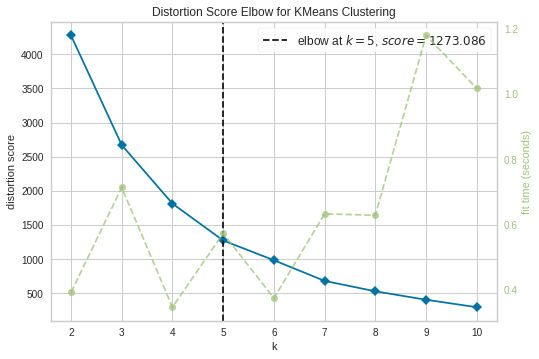

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed with PCA:')
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()
PCA_n_clusters_elbow = Elbow_M.elbow_value_

## Agglomerative Clustering
Agglomerative clustering is a hierarchical clustering method

It involves merging examples until the desired number of clusters is achieved

In [ ]:
AC_PCA_data = original_data.copy()
AC_PCA_ds = PCA_ds.copy()

In [ ]:
#Initiating the Agglomerative Clustering model 
AC_PCA = AgglomerativeClustering(n_clusters = PCA_n_clusters_elbow)
# fit model and predict clusters
label_AC = AC_PCA.fit_predict(AC_PCA_ds)
#Adding the Clusters feature to the dataframe with reduced dimensions
AC_PCA_ds["AC_Clusters"] = label_AC
#Adding the Clusters feature to the orignal dataframe
AC_PCA_data["AC_Clusters"] = label_AC

In [ ]:
AC_PCA_data

Crop  N_min  N_max  P_min  P_max  K_min  K_max   Avg_Temp  \
0            Arecanut     79    100     28     40     79    140  28.236667   
1            Arecanut     79    100     28     40     79    140  28.294583   
2            Arecanut     79    100     28     40     79    140  28.545833   
3            Arecanut     79    100     28     40     79    140  28.487500   
4            Arecanut     79    100     28     40     79    140  28.289167   
...               ...    ...    ...    ...    ...    ...    ...        ...   
30627  other oilseeds     90    100     10     15     45     50  27.330417   
30628  other oilseeds     90    100     10     15     45     50  27.190833   
30629  other oilseeds     90    100     10     15     45     50  27.066250   
30630  other oilseeds     90    100     10     15     45     50  27.972083   
30631  other oilseeds     90    100     10     15     45     50  27.165833   

       Rainfall  Productivity        EUR/ha    EUR/kg    Area  Production  \
0       1189.48   2750.000000  14119.607590  5.134403     4.0        11.0   
1        887.11   1750.000000   8985.204830  5.134403     4.0         7.0   
2        788.69   1444.444444   7416.359542  5.134403    18.0        26.0   
3        805.96    722.222222   3708.179771  5.134403    18.0        13.0   
4       1822.37    444.444444   2281.956782  5.134403     9.0         4.0   
...         ...           ...           ...       ...     ...         ...   
30627    815.89    500.000000    855.733794  1.711468  1600.0       800.0   
30628   1323.06    500.000000    855.733794  1.711468   800.0       400.0   
30629   2632.85    500.000000    855.733794  1.711468   200.0       100.0   
30630    575.07    500.000000    855.733794  1.711468   200.0       100.0   
30631    882.21    436.781609    747.537567  1.711468  8700.0      3800.0   

       Production_kg  AC_Clusters  
0            11000.0            0  
1             7000.0            0  
2            26000.0            0  
3            13000.0            0  
4             4000.0            0  
...              ...          ...  
30627       800000.0            0  
30628       400000.0            0  
30629       100000.0            0  
30630       100000.0            0  
30631      3800000.0            0  

[30632 rows x 16 columns]

In [ ]:
AC_PCA_data.describe()

N_min         N_max         P_min         P_max         K_min  \
count  30632.000000  30632.000000  30632.000000  30632.000000  30632.000000   
mean      69.079068    165.353846     48.279479     77.556934     71.689247   
std       55.556031    122.934628     21.572683     42.334731     68.540825   
min        8.000000     10.000000      5.000000      8.000000      0.000000   
25%       25.000000     60.000000     28.000000     45.000000     30.000000   
50%       60.000000    100.000000     50.000000     67.000000     60.000000   
75%      105.000000    303.000000     60.000000     95.000000     75.000000   
max      200.000000    400.000000    110.000000    250.000000    515.000000   

              K_max      Avg_Temp      Rainfall  Productivity        EUR/ha  \
count  30632.000000  30632.000000  30632.000000  3.063200e+04  3.063200e+04   
mean     166.556052     26.084822   1178.790085  3.698977e+04  1.004369e+04   
std      153.449917      1.233055    681.794662  1.351138e+06  2.467437e+05   
min       20.000000     20.491667     34.240000  0.000000e+00  0.000000e+00   
25%       60.000000     25.315521    755.730000  7.500000e+02  1.140978e+03   
50%      120.000000     26.077500   1013.600000  2.750000e+03  2.738348e+03   
75%      220.000000     26.800833   1357.330000  1.300000e+04  6.884147e+03   
max      520.000000     29.852083   5505.020000  8.800000e+07  1.606498e+07   

             EUR/kg           Area    Production  Production_kg   AC_Clusters  
count  30632.000000   30632.000000  3.063200e+04   3.063200e+04  30632.000000  
mean       1.679121    4532.816793  9.857387e+04   9.857387e+07      1.165905  
std        2.613743   22580.340784  7.616118e+05   7.616118e+08      1.424092  
min        0.182557       1.000000  0.000000e+00   0.000000e+00      0.000000  
25%        0.228196      41.000000  6.400000e+01   6.400000e+04      0.000000  
50%        0.855734     256.000000  6.600000e+02   6.600000e+05      1.000000  
75%        1.825565    1574.000000  8.755750e+03   8.755750e+06      2.000000  
max       17.114676  884618.000000  3.715800e+07   3.715800e+10      4.000000

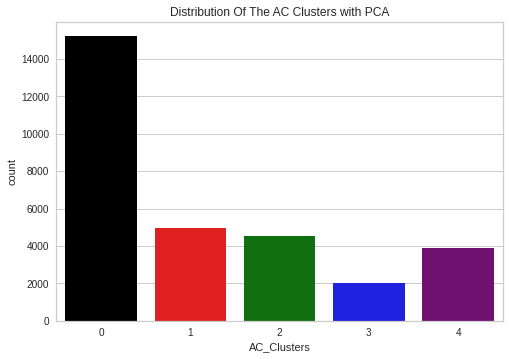

In [ ]:
#Plotting countplot of clusters
pallet = ["black", "red", "green", "blue", "purple"]
pl = sns.countplot(x = AC_PCA_data["AC_Clusters"], palette = pallet)
pl.set_title("Distribution Of The AC Clusters with PCA")
plt.show()

In [ ]:
ac_PCA_clusters_distribution = AC_PCA_data["AC_Clusters"].value_counts()
print("The distribution for each AC cluster with PCA is:\n{}".format(ac_PCA_clusters_distribution))

The distribution for each AC cluster with PCA is:
0    15215
1     4947
2     4542
4     3899
3     2029
Name: AC_Clusters, dtype: int64


Reletive Plot of All the Features in the AC Clusters with PCA


<Figure size 576x396 with 0 Axes>

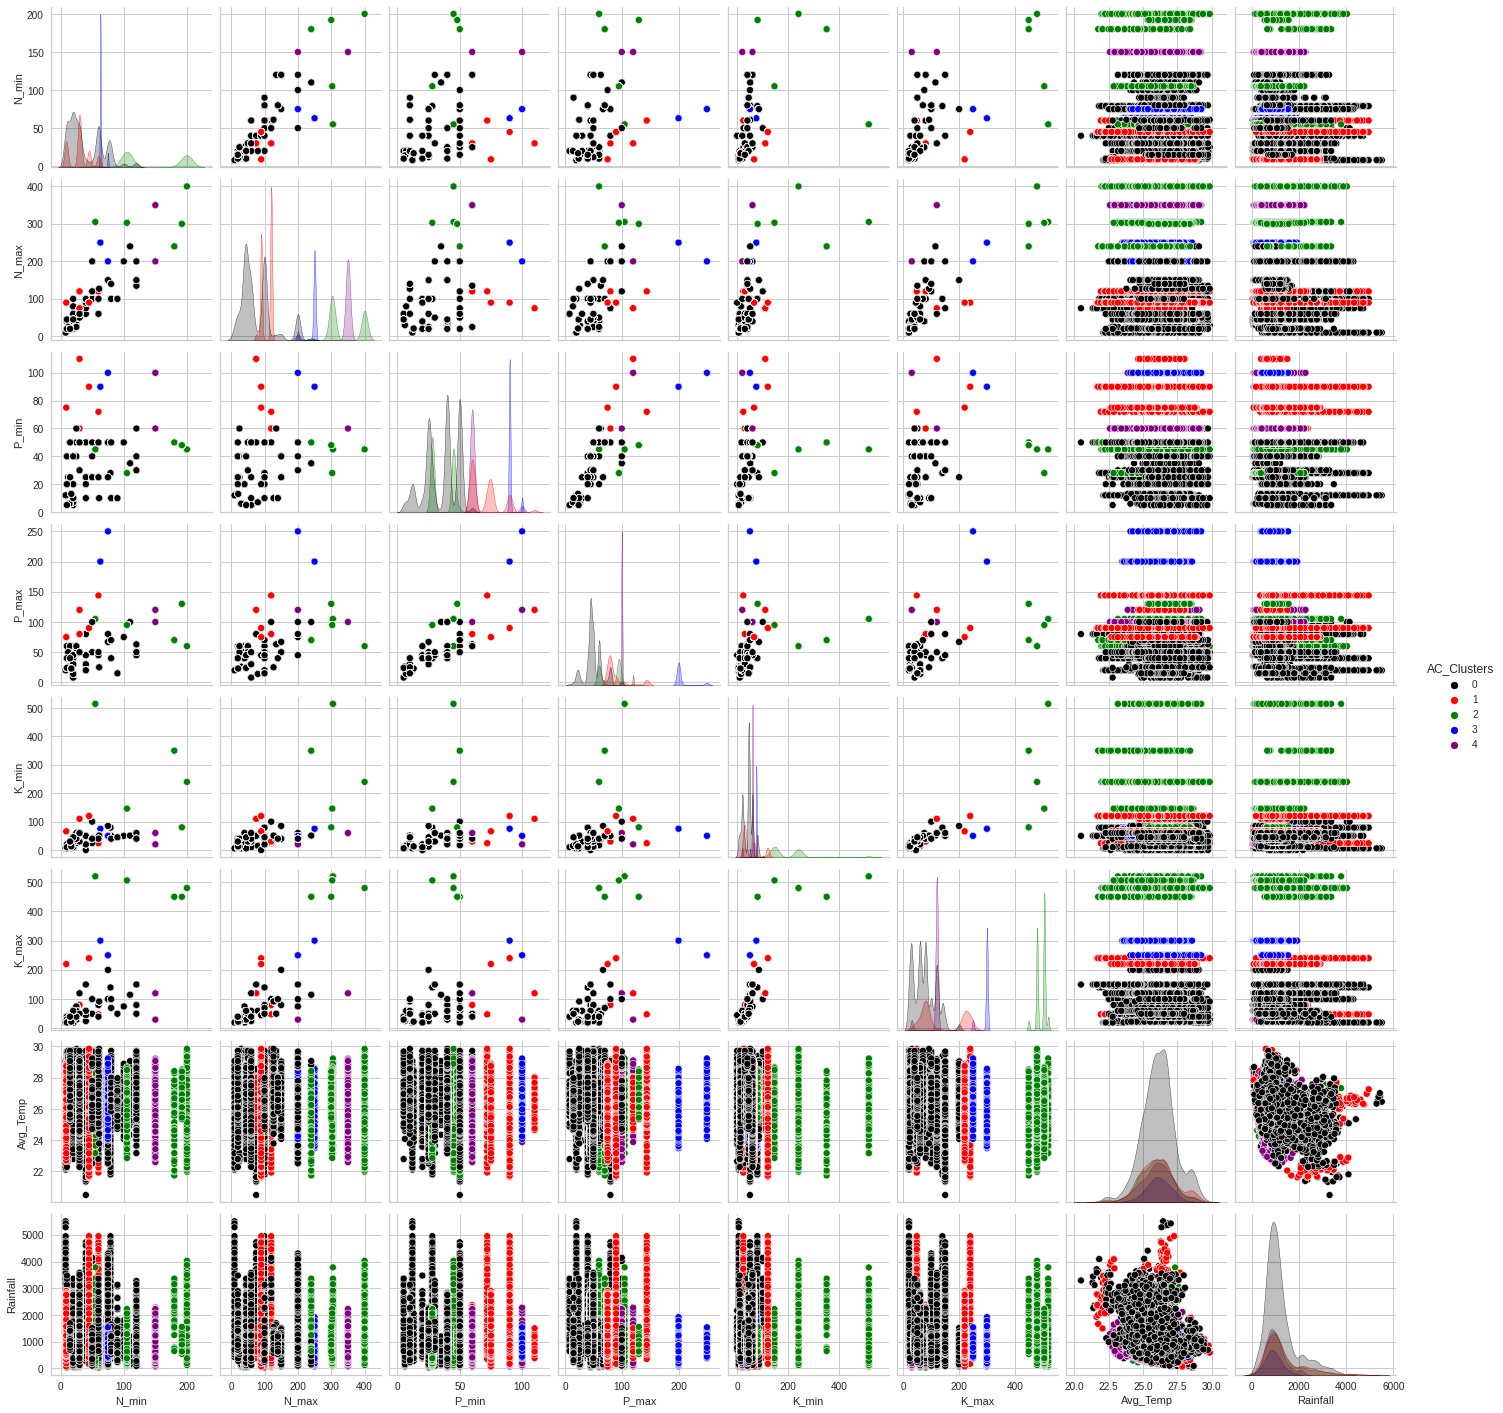

In [ ]:
#Plotting features
To_Plot = ["N_min",	"N_max",	"P_min",	"P_max",	"K_min",	"K_max",	"Avg_Temp",	"Rainfall", "AC_Clusters"]
print("Reletive Plot of All the Features in the AC Clusters with PCA")
plt.figure()
sns.pairplot(AC_PCA_data[To_Plot], hue = "AC_Clusters", palette = pallet)
plt.show()

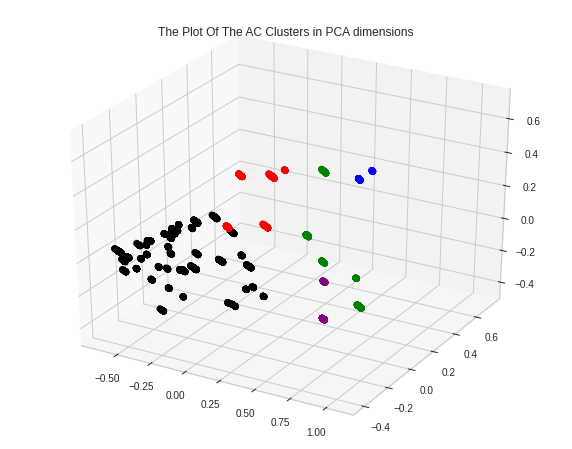

In [ ]:
cmap_clusters = (mpl.colors.ListedColormap(["black", "red", "green", "blue", "purple"]))
fig = plt.figure(figsize = (10,8))
ax = plt.subplot(111, projection = '3d', label = "bla")
ax.scatter(x_pca, y_pca, z_pca, s = 40, c = AC_PCA_ds["AC_Clusters"], marker = 'o', cmap = cmap_clusters)
ax.set_title("The Plot Of The AC Clusters in PCA dimensions")
plt.show()

In [ ]:
AC_PCA_cluster0_df = AC_PCA_data[AC_PCA_data["AC_Clusters"] == 0]
AC_PCA_cluster1_df = AC_PCA_data[AC_PCA_data["AC_Clusters"] == 1]
AC_PCA_cluster2_df = AC_PCA_data[AC_PCA_data["AC_Clusters"] == 2]
AC_PCA_cluster3_df = AC_PCA_data[AC_PCA_data["AC_Clusters"] == 3]
AC_PCA_cluster4_df = AC_PCA_data[AC_PCA_data["AC_Clusters"] == 4]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

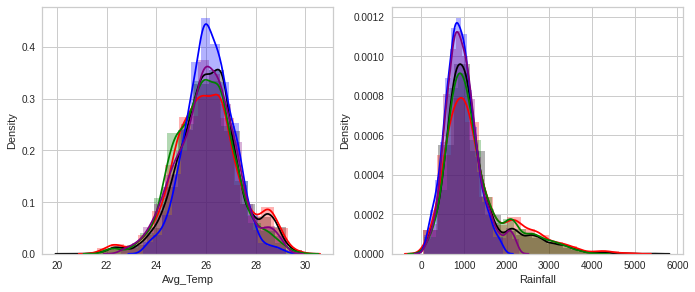

In [ ]:
plt.figure(figsize = (24,10))
plt.subplot(2, 4, 1)
sns.distplot(AC_PCA_cluster0_df['Avg_Temp'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster1_df['Avg_Temp'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster2_df['Avg_Temp'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster3_df['Avg_Temp'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster4_df['Avg_Temp'],color="purple",bins=15,hist_kws={'alpha':0.3})

plt.subplot(2, 4, 2)
sns.distplot(AC_PCA_cluster0_df['Rainfall'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster1_df['Rainfall'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster2_df['Rainfall'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster3_df['Rainfall'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster4_df['Rainfall'],color="purple",bins=15,hist_kws={'alpha':0.3})

> Each crop in each cluster it is equally distributed for Temperature and Rainfall so we can say that this 2 features don't impact the clustering

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

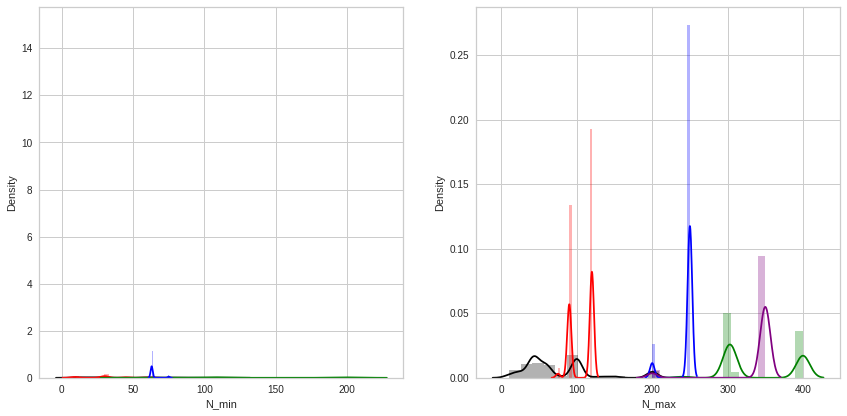

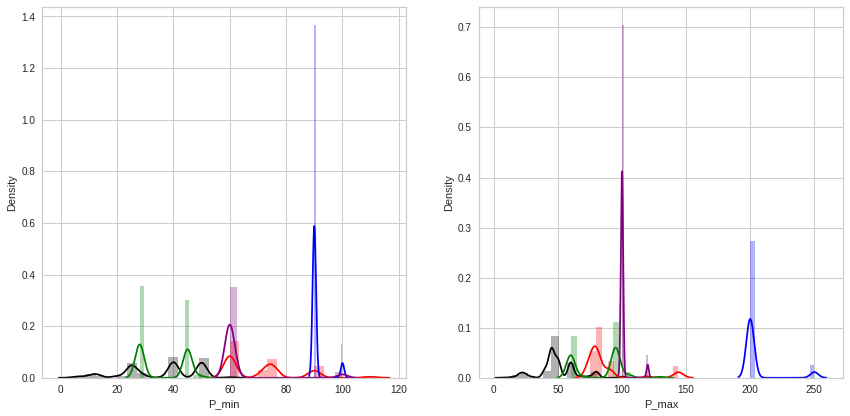

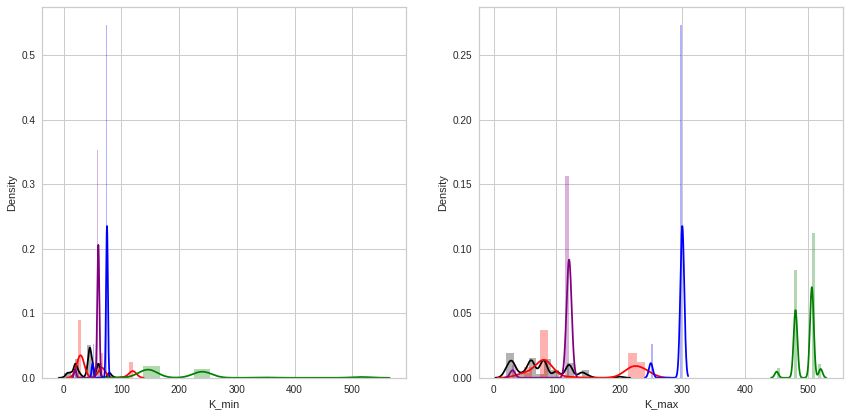

In [ ]:
# N_min / N_max
plt.figure(figsize = (30,15))
plt.subplot(2, 4, 1)
sns.distplot(AC_PCA_cluster0_df['N_min'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster1_df['N_min'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster2_df['N_min'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster3_df['N_min'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster4_df['N_min'],color="purple",bins=15,hist_kws={'alpha':0.3})

plt.subplot(2, 4, 2)
sns.distplot(AC_PCA_cluster0_df['N_max'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster1_df['N_max'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster2_df['N_max'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster3_df['N_max'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster4_df['N_max'],color="purple",bins=15,hist_kws={'alpha':0.3})

# P_min / P_max
plt.figure(figsize = (30,15))
plt.subplot(2, 4, 1)
sns.distplot(AC_PCA_cluster0_df['P_min'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster1_df['P_min'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster2_df['P_min'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster3_df['P_min'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster4_df['P_min'],color="purple",bins=15,hist_kws={'alpha':0.3})

plt.subplot(2, 4, 2)
sns.distplot(AC_PCA_cluster0_df['P_max'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster1_df['P_max'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster2_df['P_max'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster3_df['P_max'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster4_df['P_max'],color="purple",bins=15,hist_kws={'alpha':0.3})

# K_min / K_max
plt.figure(figsize = (30,15))
plt.subplot(2, 4, 1)
sns.distplot(AC_PCA_cluster0_df['K_min'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster1_df['K_min'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster2_df['K_min'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster3_df['K_min'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster4_df['K_min'],color="purple",bins=15,hist_kws={'alpha':0.3})

plt.subplot(2, 4, 2)
sns.distplot(AC_PCA_cluster0_df['K_max'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster1_df['K_max'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster2_df['K_max'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster3_df['K_max'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_PCA_cluster4_df['K_max'],color="purple",bins=15,hist_kws={'alpha':0.3})

We can see that the crops have been clustered by the NPK values

In [ ]:
count_AC_PCA = AC_PCA_data.copy()
count_AC_PCA = count_AC_PCA.drop(columns = ["N_min", "N_max", "P_min", "P_max", "K_min", "K_max", "Avg_Temp", "Rainfall", "Area", "Productivity", "EUR/ha", "EUR/kg", "Production", "Production_kg"])
count_AC_PCA["Count"] = 1
count_AC_PCA = count_AC_PCA.groupby(["Crop", "AC_Clusters"]).sum().reset_index()
count_AC_PCA

Crop  AC_Clusters  Count
0                    Arecanut            0    830
1                   Arhar/Tur            0    141
2                       Bajra            0     86
3                      Banana            2   1773
4   Beans & Mutter(Vegetable)            0     84
5                      Bhindi            0    128
6                Bitter Gourd            0     47
7                Black pepper            0    453
8                     Brinjal            0    157
9                     Cabbage            0     87
10                   Cardamom            0    194
11                  Cashewnut            1    526
12                Castor seed            0    101
13                Cauliflower            0     94
14               Citrus Fruit            0    184
15                  Coriander            0   1835
16               Cotton(lint)            0    212
17                 Drum Stick            0     70
18               Dry chillies            1   2330
19                 Dry ginger            0    831
20                     Garlic            3   1850
21                       Gram            0    103
22                     Grapes            0     75
23                  Groundnut            0    148
24                  Guar seed            0    539
25                 Horse-gram            0     55
26                 Jack Fruit            0     48
27                      Jowar            0     88
28                    Linseed            0     48
29                      Maize            0    123
30                      Mango            4    234
31                     Masoor            0     42
32                      Mesta            0     66
33          Moong(Green Gram)            0     87
34                 Niger seed            0     45
35                      Onion            0   2538
36                     Orange            0    103
37                     Papaya            2    232
38      Peas & beans (Pulses)            1    109
39                  Pineapple            2     86
40                 Pome Fruit            0    189
41                     Potato            2   2374
42                       Ragi            0     93
43          Rapeseed &Mustard            2     77
44                       Rice            0     66
45                    Sesamum            0    491
46              Small millets            0     98
47                 Snak Guard            0     46
48                   Soyabean            0     42
49                  Sugarcane            4   3665
50                  Sunflower            0    150
51               Sweet potato            0   2034
52                    Tapioca            1    769
53                    Tobacco            1   1213
54                     Tomato            3    179
55                   Turmeric            0   2120
56                       Urad            0     78
57                Water Melon            0     65
58                      Wheat            0     49
59             other oilseeds            0     52

Since we have 60 crops in the above dataframe we can see that all the crops are in a single cluster, there is no overlapping

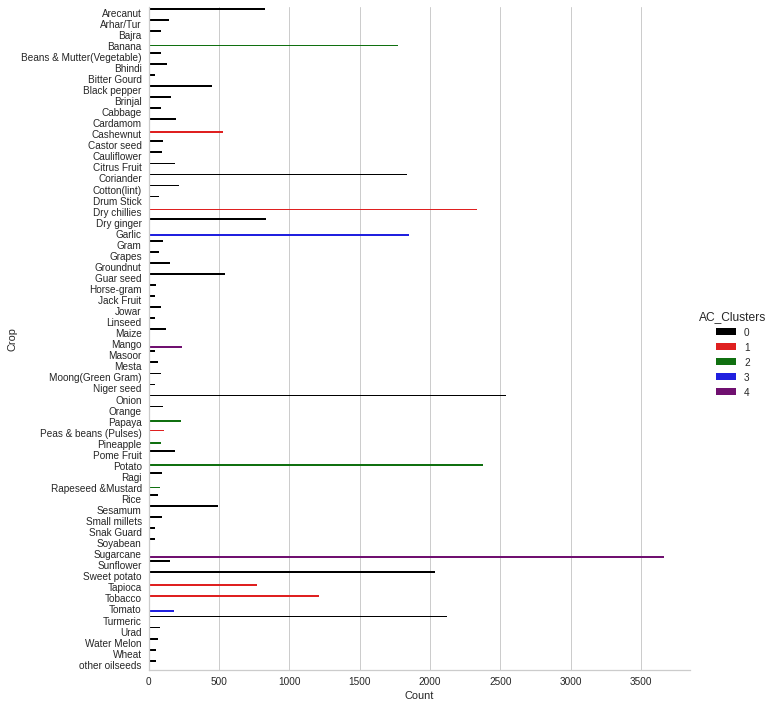

In [ ]:
sns.catplot(data = count_AC_PCA, x = "Count", y = "Crop", hue = "AC_Clusters", kind = "bar", height = 10, palette = pallet)

## KMeans

In [ ]:
KM_PCA_data = original_data.copy()
KM_PCA_ds = PCA_ds.copy()

In [ ]:
KM_PCA_model = KMeans(n_clusters = PCA_n_clusters_elbow, init = 'random')
label_KM = KM_PCA_model.fit_predict(KM_PCA_ds)
KM_PCA_ds["KM_Clusters"] = label_KM
KM_PCA_data["KM_Clusters"] = label_KM

In [ ]:
KM_PCA_data

Crop  N_min  N_max  P_min  P_max  K_min  K_max   Avg_Temp  \
0            Arecanut     79    100     28     40     79    140  28.236667   
1            Arecanut     79    100     28     40     79    140  28.294583   
2            Arecanut     79    100     28     40     79    140  28.545833   
3            Arecanut     79    100     28     40     79    140  28.487500   
4            Arecanut     79    100     28     40     79    140  28.289167   
...               ...    ...    ...    ...    ...    ...    ...        ...   
30627  other oilseeds     90    100     10     15     45     50  27.330417   
30628  other oilseeds     90    100     10     15     45     50  27.190833   
30629  other oilseeds     90    100     10     15     45     50  27.066250   
30630  other oilseeds     90    100     10     15     45     50  27.972083   
30631  other oilseeds     90    100     10     15     45     50  27.165833   

       Rainfall  Productivity        EUR/ha    EUR/kg    Area  Production  \
0       1189.48   2750.000000  14119.607590  5.134403     4.0        11.0   
1        887.11   1750.000000   8985.204830  5.134403     4.0         7.0   
2        788.69   1444.444444   7416.359542  5.134403    18.0        26.0   
3        805.96    722.222222   3708.179771  5.134403    18.0        13.0   
4       1822.37    444.444444   2281.956782  5.134403     9.0         4.0   
...         ...           ...           ...       ...     ...         ...   
30627    815.89    500.000000    855.733794  1.711468  1600.0       800.0   
30628   1323.06    500.000000    855.733794  1.711468   800.0       400.0   
30629   2632.85    500.000000    855.733794  1.711468   200.0       100.0   
30630    575.07    500.000000    855.733794  1.711468   200.0       100.0   
30631    882.21    436.781609    747.537567  1.711468  8700.0      3800.0   

       Production_kg  KM_Clusters  
0            11000.0            1  
1             7000.0            1  
2            26000.0            1  
3            13000.0            1  
4             4000.0            1  
...              ...          ...  
30627       800000.0            1  
30628       400000.0            1  
30629       100000.0            1  
30630       100000.0            1  
30631      3800000.0            1  

[30632 rows x 16 columns]

In [ ]:
KM_PCA_data.describe()

N_min         N_max         P_min         P_max         K_min  \
count  30632.000000  30632.000000  30632.000000  30632.000000  30632.000000   
mean      69.079068    165.353846     48.279479     77.556934     71.689247   
std       55.556031    122.934628     21.572683     42.334731     68.540825   
min        8.000000     10.000000      5.000000      8.000000      0.000000   
25%       25.000000     60.000000     28.000000     45.000000     30.000000   
50%       60.000000    100.000000     50.000000     67.000000     60.000000   
75%      105.000000    303.000000     60.000000     95.000000     75.000000   
max      200.000000    400.000000    110.000000    250.000000    515.000000   

              K_max      Avg_Temp      Rainfall  Productivity        EUR/ha  \
count  30632.000000  30632.000000  30632.000000  3.063200e+04  3.063200e+04   
mean     166.556052     26.084822   1178.790085  3.698977e+04  1.004369e+04   
std      153.449917      1.233055    681.794662  1.351138e+06  2.467437e+05   
min       20.000000     20.491667     34.240000  0.000000e+00  0.000000e+00   
25%       60.000000     25.315521    755.730000  7.500000e+02  1.140978e+03   
50%      120.000000     26.077500   1013.600000  2.750000e+03  2.738348e+03   
75%      220.000000     26.800833   1357.330000  1.300000e+04  6.884147e+03   
max      520.000000     29.852083   5505.020000  8.800000e+07  1.606498e+07   

             EUR/kg           Area    Production  Production_kg   KM_Clusters  
count  30632.000000   30632.000000  3.063200e+04   3.063200e+04  30632.000000  
mean       1.679121    4532.816793  9.857387e+04   9.857387e+07      1.455243  
std        2.613743   22580.340784  7.616118e+05   7.616118e+08      1.276204  
min        0.182557       1.000000  0.000000e+00   0.000000e+00      0.000000  
25%        0.228196      41.000000  6.400000e+01   6.400000e+04      1.000000  
50%        0.855734     256.000000  6.600000e+02   6.600000e+05      1.000000  
75%        1.825565    1574.000000  8.755750e+03   8.755750e+06      2.000000  
max       17.114676  884618.000000  3.715800e+07   3.715800e+10      4.000000

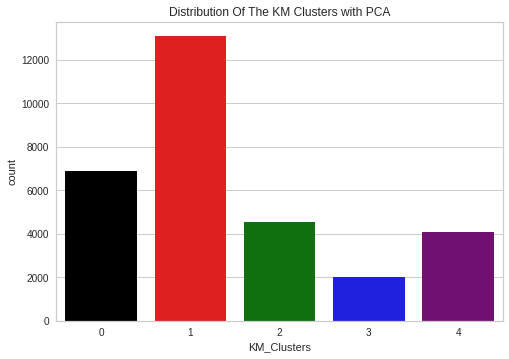

In [ ]:
#Plotting countplot of clusters
pallet = ["black", "red", "green", "blue", "purple"]
pl = sns.countplot(x = KM_PCA_data["KM_Clusters"], palette = pallet)
pl.set_title("Distribution Of The KM Clusters with PCA")
plt.show()

In [ ]:
km_PCA_clusters_distribution = KM_PCA_data["KM_Clusters"].value_counts()
print("The distribution for each KM cluster with PCA is:\n{}".format(km_PCA_clusters_distribution))

The distribution for each AC cluster with PCA is:
1    13098
0     6886
2     4542
4     4077
3     2029
Name: KM_Clusters, dtype: int64


Reletive Plot of All the Features in the KM Clusters with PCA


<Figure size 576x396 with 0 Axes>

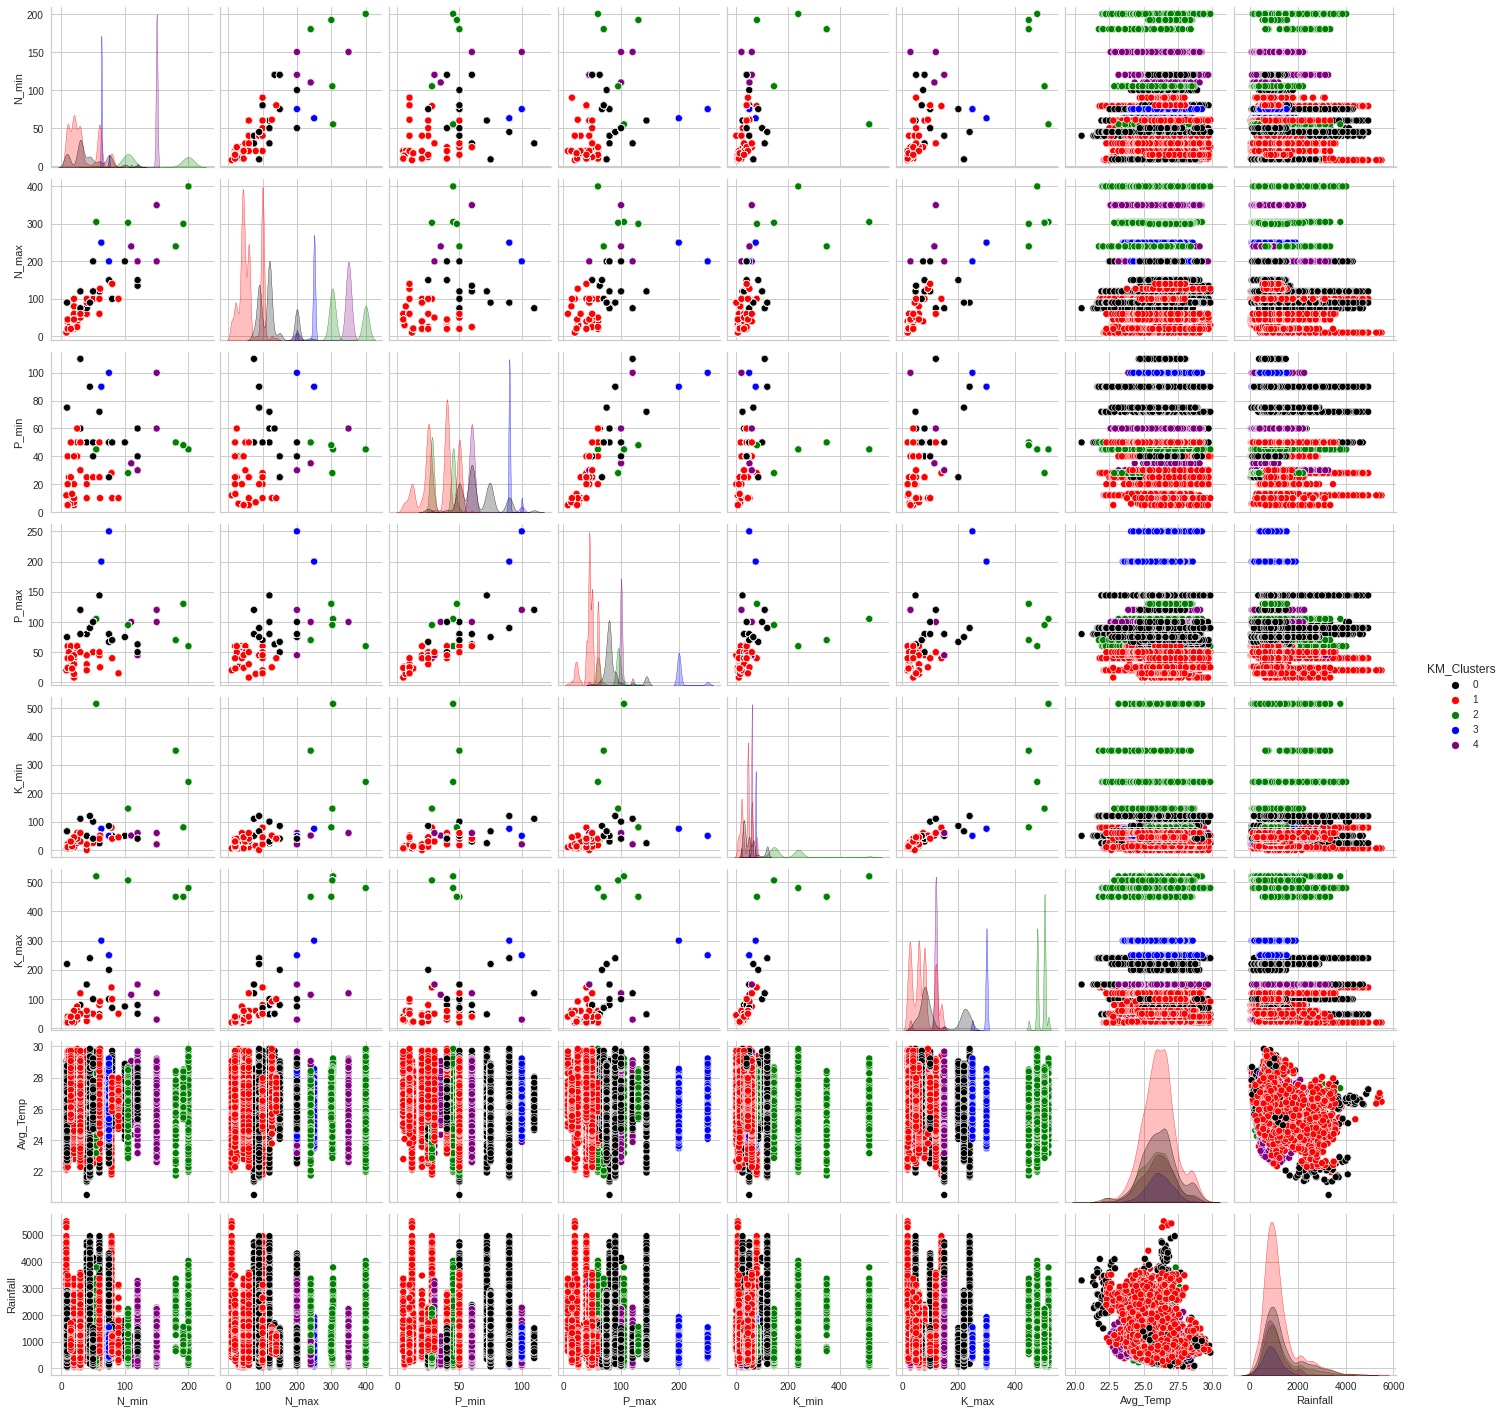

In [ ]:
#Plotting features
To_Plot = ["N_min",	"N_max",	"P_min",	"P_max",	"K_min",	"K_max",	"Avg_Temp",	"Rainfall", "KM_Clusters"]
print("Reletive Plot of All the Features in the KM Clusters with PCA")
plt.figure()
sns.pairplot(KM_PCA_data[To_Plot], hue = "KM_Clusters", palette = pallet)
plt.show()

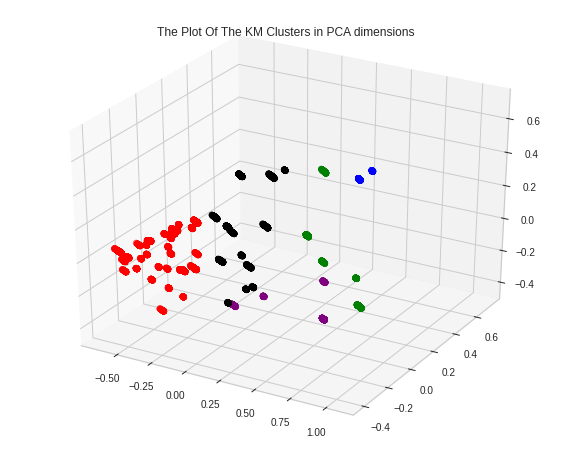

In [ ]:
cmap_clusters = (mpl.colors.ListedColormap(["black", "red", "green", "blue", "purple"]))
fig = plt.figure(figsize = (10,8))
ax = plt.subplot(111, projection = '3d', label = "bla")
ax.scatter(x_pca, y_pca, z_pca, s = 40, c = KM_PCA_ds["KM_Clusters"], marker = 'o', cmap = cmap_clusters)
ax.set_title("The Plot Of The KM Clusters in PCA dimensions")
plt.show()

In [ ]:
KM_PCA_cluster0_df = KM_PCA_data[KM_PCA_data["KM_Clusters"] == 0]
KM_PCA_cluster1_df = KM_PCA_data[KM_PCA_data["KM_Clusters"] == 1]
KM_PCA_cluster2_df = KM_PCA_data[KM_PCA_data["KM_Clusters"] == 2]
KM_PCA_cluster3_df = KM_PCA_data[KM_PCA_data["KM_Clusters"] == 3]
KM_PCA_cluster4_df = KM_PCA_data[KM_PCA_data["KM_Clusters"] == 4]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

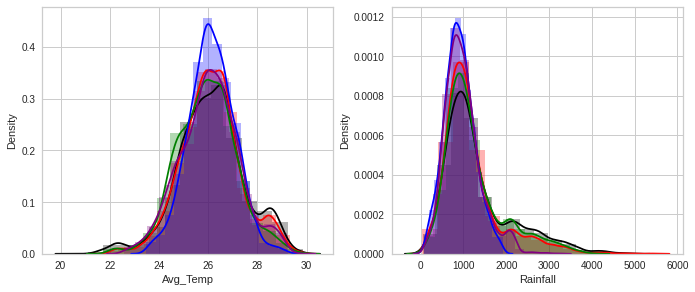

In [ ]:
plt.figure(figsize = (24,10))
plt.subplot(2, 4, 1)
sns.distplot(KM_PCA_cluster0_df['Avg_Temp'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster1_df['Avg_Temp'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster2_df['Avg_Temp'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster3_df['Avg_Temp'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster4_df['Avg_Temp'],color="purple",bins=15,hist_kws={'alpha':0.3})

plt.subplot(2, 4, 2)
sns.distplot(KM_PCA_cluster0_df['Rainfall'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster1_df['Rainfall'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster2_df['Rainfall'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster3_df['Rainfall'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster4_df['Rainfall'],color="purple",bins=15,hist_kws={'alpha':0.3})

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

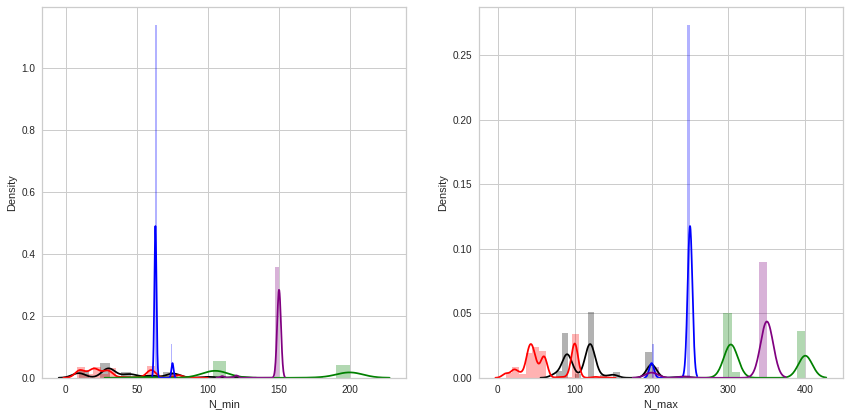

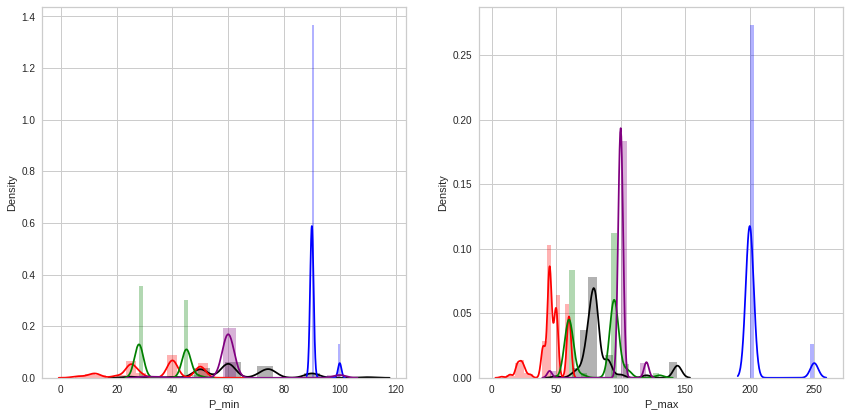

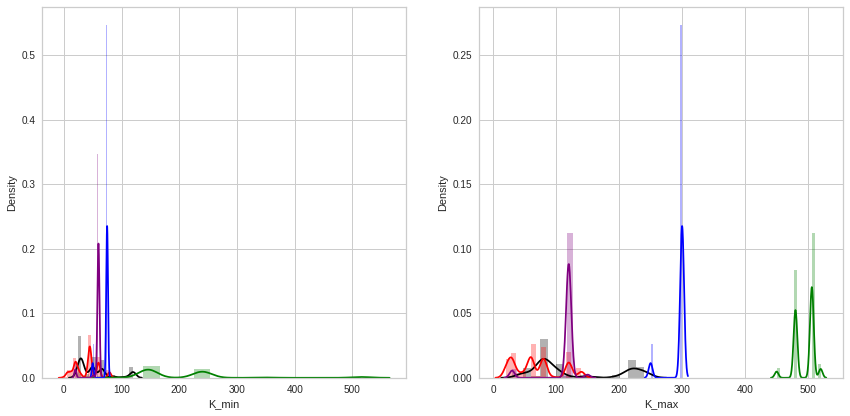

In [ ]:
# N_min / N_max
plt.figure(figsize = (30,15))
plt.subplot(2, 4, 1)
sns.distplot(KM_PCA_cluster0_df['N_min'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster1_df['N_min'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster2_df['N_min'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster3_df['N_min'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster4_df['N_min'],color="purple",bins=15,hist_kws={'alpha':0.3})

plt.subplot(2, 4, 2)
sns.distplot(KM_PCA_cluster0_df['N_max'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster1_df['N_max'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster2_df['N_max'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster3_df['N_max'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster4_df['N_max'],color="purple",bins=15,hist_kws={'alpha':0.3})

# P_min / P_max
plt.figure(figsize = (30,15))
plt.subplot(2, 4, 1)
sns.distplot(KM_PCA_cluster0_df['P_min'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster1_df['P_min'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster2_df['P_min'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster3_df['P_min'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster4_df['P_min'],color="purple",bins=15,hist_kws={'alpha':0.3})

plt.subplot(2, 4, 2)
sns.distplot(KM_PCA_cluster0_df['P_max'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster1_df['P_max'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster2_df['P_max'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster3_df['P_max'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster4_df['P_max'],color="purple",bins=15,hist_kws={'alpha':0.3})

# K_min / K_max
plt.figure(figsize = (30,15))
plt.subplot(2, 4, 1)
sns.distplot(KM_PCA_cluster0_df['K_min'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster1_df['K_min'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster2_df['K_min'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster3_df['K_min'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster4_df['K_min'],color="purple",bins=15,hist_kws={'alpha':0.3})

plt.subplot(2, 4, 2)
sns.distplot(KM_PCA_cluster0_df['K_max'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster1_df['K_max'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster2_df['K_max'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster3_df['K_max'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_PCA_cluster4_df['K_max'],color="purple",bins=15,hist_kws={'alpha':0.3})

In [ ]:
count_KM_PCA = KM_PCA_data.copy()
count_KM_PCA = count_KM_PCA.drop(columns = ["N_min", "N_max", "P_min", "P_max", "K_min", "K_max", "Avg_Temp", "Rainfall", "Area", "Productivity", "EUR/ha", "EUR/kg", "Production", "Production_kg"])
count_KM_PCA["Count"] = 1
count_KM_PCA = count_KM_PCA.groupby(["Crop", "KM_Clusters"]).sum().reset_index()
count_KM_PCA

Crop  KM_Clusters  Count
0                    Arecanut            1    830
1                   Arhar/Tur            1    141
2                       Bajra            1     86
3                      Banana            2   1773
4   Beans & Mutter(Vegetable)            1     84
5                      Bhindi            1    128
6                Bitter Gourd            1     47
7                Black pepper            1    453
8                     Brinjal            0    157
9                     Cabbage            1     87
10                   Cardamom            0    194
11                  Cashewnut            0    526
12                Castor seed            1    101
13                Cauliflower            0     94
14               Citrus Fruit            1    184
15                  Coriander            1   1835
16               Cotton(lint)            1    212
17                 Drum Stick            0     70
18               Dry chillies            0   2330
19                 Dry ginger            0    831
20                     Garlic            3   1850
21                       Gram            1    103
22                     Grapes            4     75
23                  Groundnut            1    148
24                  Guar seed            1    539
25                 Horse-gram            1     55
26                 Jack Fruit            1     48
27                      Jowar            1     88
28                    Linseed            1     48
29                      Maize            0    123
30                      Mango            4    234
31                     Masoor            1     42
32                      Mesta            1     66
33          Moong(Green Gram)            1     87
34                 Niger seed            1     45
35                      Onion            1   2538
36                     Orange            4    103
37                     Papaya            2    232
38      Peas & beans (Pulses)            0    109
39                  Pineapple            2     86
40                 Pome Fruit            0    189
41                     Potato            2   2374
42                       Ragi            1     93
43          Rapeseed &Mustard            2     77
44                       Rice            0     66
45                    Sesamum            1    491
46              Small millets            1     98
47                 Snak Guard            1     46
48                   Soyabean            1     42
49                  Sugarcane            4   3665
50                  Sunflower            0    150
51               Sweet potato            1   2034
52                    Tapioca            0    769
53                    Tobacco            0   1213
54                     Tomato            3    179
55                   Turmeric            1   2120
56                       Urad            1     78
57                Water Melon            0     65
58                      Wheat            1     49
59             other oilseeds            1     52

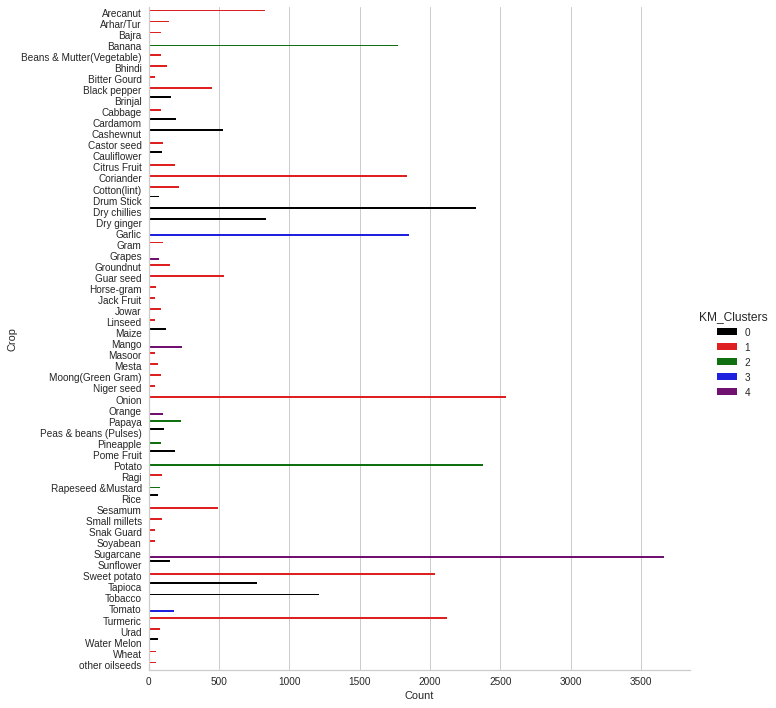

In [ ]:
sns.catplot(data = count_KM_PCA, x = "Count", y = "Crop", hue = "KM_Clusters", kind = "bar", height = 10, palette = pallet)

> same observation for Agglomerative Clustering

# Clustering without PCA

## Elbow method

Elbow Method to determine the number of clusters to be formed without PCA:


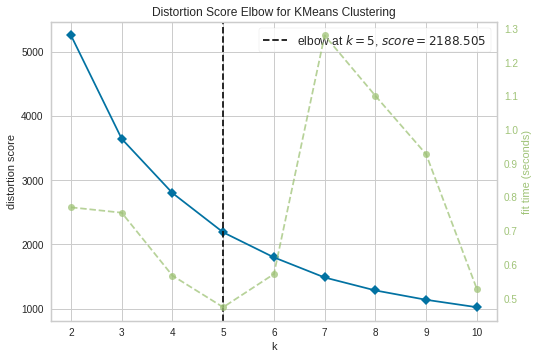

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed without PCA:')
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(scaled_ds)
Elbow_M.show()
n_clusters_elbow = Elbow_M.elbow_value_

## Agglomerative Clustering
Agglomerative clustering is a hierarchical clustering method

It involves merging examples until the desired number of clusters is achieved

In [ ]:
AC_data = original_data.copy()
AC_ds = scaled_ds.copy()

In [ ]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters = n_clusters_elbow)
# fit model and predict clusters
label_AC = AC.fit_predict(AC_ds)
#Adding the Clusters feature to the orignal dataframe
AC_data["AC_Clusters"] = label_AC

In [ ]:
AC_data

Crop  N_min  N_max  P_min  P_max  K_min  K_max   Avg_Temp  \
0            Arecanut     79    100     28     40     79    140  28.236667   
1            Arecanut     79    100     28     40     79    140  28.294583   
2            Arecanut     79    100     28     40     79    140  28.545833   
3            Arecanut     79    100     28     40     79    140  28.487500   
4            Arecanut     79    100     28     40     79    140  28.289167   
...               ...    ...    ...    ...    ...    ...    ...        ...   
30627  other oilseeds     90    100     10     15     45     50  27.330417   
30628  other oilseeds     90    100     10     15     45     50  27.190833   
30629  other oilseeds     90    100     10     15     45     50  27.066250   
30630  other oilseeds     90    100     10     15     45     50  27.972083   
30631  other oilseeds     90    100     10     15     45     50  27.165833   

       Rainfall  Productivity        EUR/ha    EUR/kg    Area  Production  \
0       1189.48   2750.000000  14119.607590  5.134403     4.0        11.0   
1        887.11   1750.000000   8985.204830  5.134403     4.0         7.0   
2        788.69   1444.444444   7416.359542  5.134403    18.0        26.0   
3        805.96    722.222222   3708.179771  5.134403    18.0        13.0   
4       1822.37    444.444444   2281.956782  5.134403     9.0         4.0   
...         ...           ...           ...       ...     ...         ...   
30627    815.89    500.000000    855.733794  1.711468  1600.0       800.0   
30628   1323.06    500.000000    855.733794  1.711468   800.0       400.0   
30629   2632.85    500.000000    855.733794  1.711468   200.0       100.0   
30630    575.07    500.000000    855.733794  1.711468   200.0       100.0   
30631    882.21    436.781609    747.537567  1.711468  8700.0      3800.0   

       Production_kg  AC_Clusters  
0            11000.0            1  
1             7000.0            1  
2            26000.0            1  
3            13000.0            1  
4             4000.0            1  
...              ...          ...  
30627       800000.0            1  
30628       400000.0            1  
30629       100000.0            1  
30630       100000.0            1  
30631      3800000.0            1  

[30632 rows x 16 columns]

In [ ]:
AC_data.describe()

N_min         N_max         P_min         P_max         K_min  \
count  30632.000000  30632.000000  30632.000000  30632.000000  30632.000000   
mean      69.079068    165.353846     48.279479     77.556934     71.689247   
std       55.556031    122.934628     21.572683     42.334731     68.540825   
min        8.000000     10.000000      5.000000      8.000000      0.000000   
25%       25.000000     60.000000     28.000000     45.000000     30.000000   
50%       60.000000    100.000000     50.000000     67.000000     60.000000   
75%      105.000000    303.000000     60.000000     95.000000     75.000000   
max      200.000000    400.000000    110.000000    250.000000    515.000000   

              K_max      Avg_Temp      Rainfall  Productivity        EUR/ha  \
count  30632.000000  30632.000000  30632.000000  3.063200e+04  3.063200e+04   
mean     166.556052     26.084822   1178.790085  3.698977e+04  1.004369e+04   
std      153.449917      1.233055    681.794662  1.351138e+06  2.467437e+05   
min       20.000000     20.491667     34.240000  0.000000e+00  0.000000e+00   
25%       60.000000     25.315521    755.730000  7.500000e+02  1.140978e+03   
50%      120.000000     26.077500   1013.600000  2.750000e+03  2.738348e+03   
75%      220.000000     26.800833   1357.330000  1.300000e+04  6.884147e+03   
max      520.000000     29.852083   5505.020000  8.800000e+07  1.606498e+07   

             EUR/kg           Area    Production  Production_kg   AC_Clusters  
count  30632.000000   30632.000000  3.063200e+04   3.063200e+04  30632.000000  
mean       1.679121    4532.816793  9.857387e+04   9.857387e+07      1.575607  
std        2.613743   22580.340784  7.616118e+05   7.616118e+08      1.198779  
min        0.182557       1.000000  0.000000e+00   0.000000e+00      0.000000  
25%        0.228196      41.000000  6.400000e+01   6.400000e+04      1.000000  
50%        0.855734     256.000000  6.600000e+02   6.600000e+05      1.000000  
75%        1.825565    1574.000000  8.755750e+03   8.755750e+06      2.000000  
max       17.114676  884618.000000  3.715800e+07   3.715800e+10      4.000000

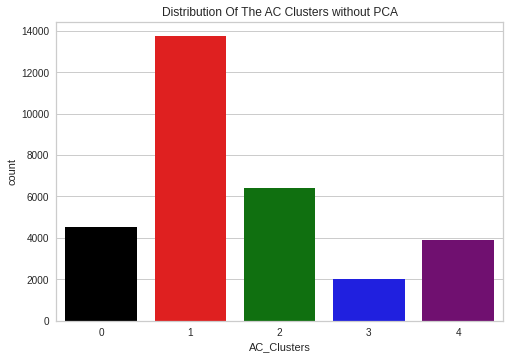

In [ ]:
#Plotting countplot of clusters
pallet = ["black", "red", "green", "blue", "purple"]
pl = sns.countplot(x = AC_data["AC_Clusters"], palette = pallet)
pl.set_title("Distribution Of The AC Clusters without PCA")
plt.show()

In [ ]:
ac_clusters_distribution = AC_data["AC_Clusters"].value_counts()
print("The distribution for each AC cluster without PCA is:\n{}".format(ac_clusters_distribution))

The distribution for each AC cluster without PCA is:
1    13743
2     6419
0     4542
4     3899
3     2029
Name: AC_Clusters, dtype: int64


Reletive Plot of All the Features in the AC Clusters without PCA


<Figure size 576x396 with 0 Axes>

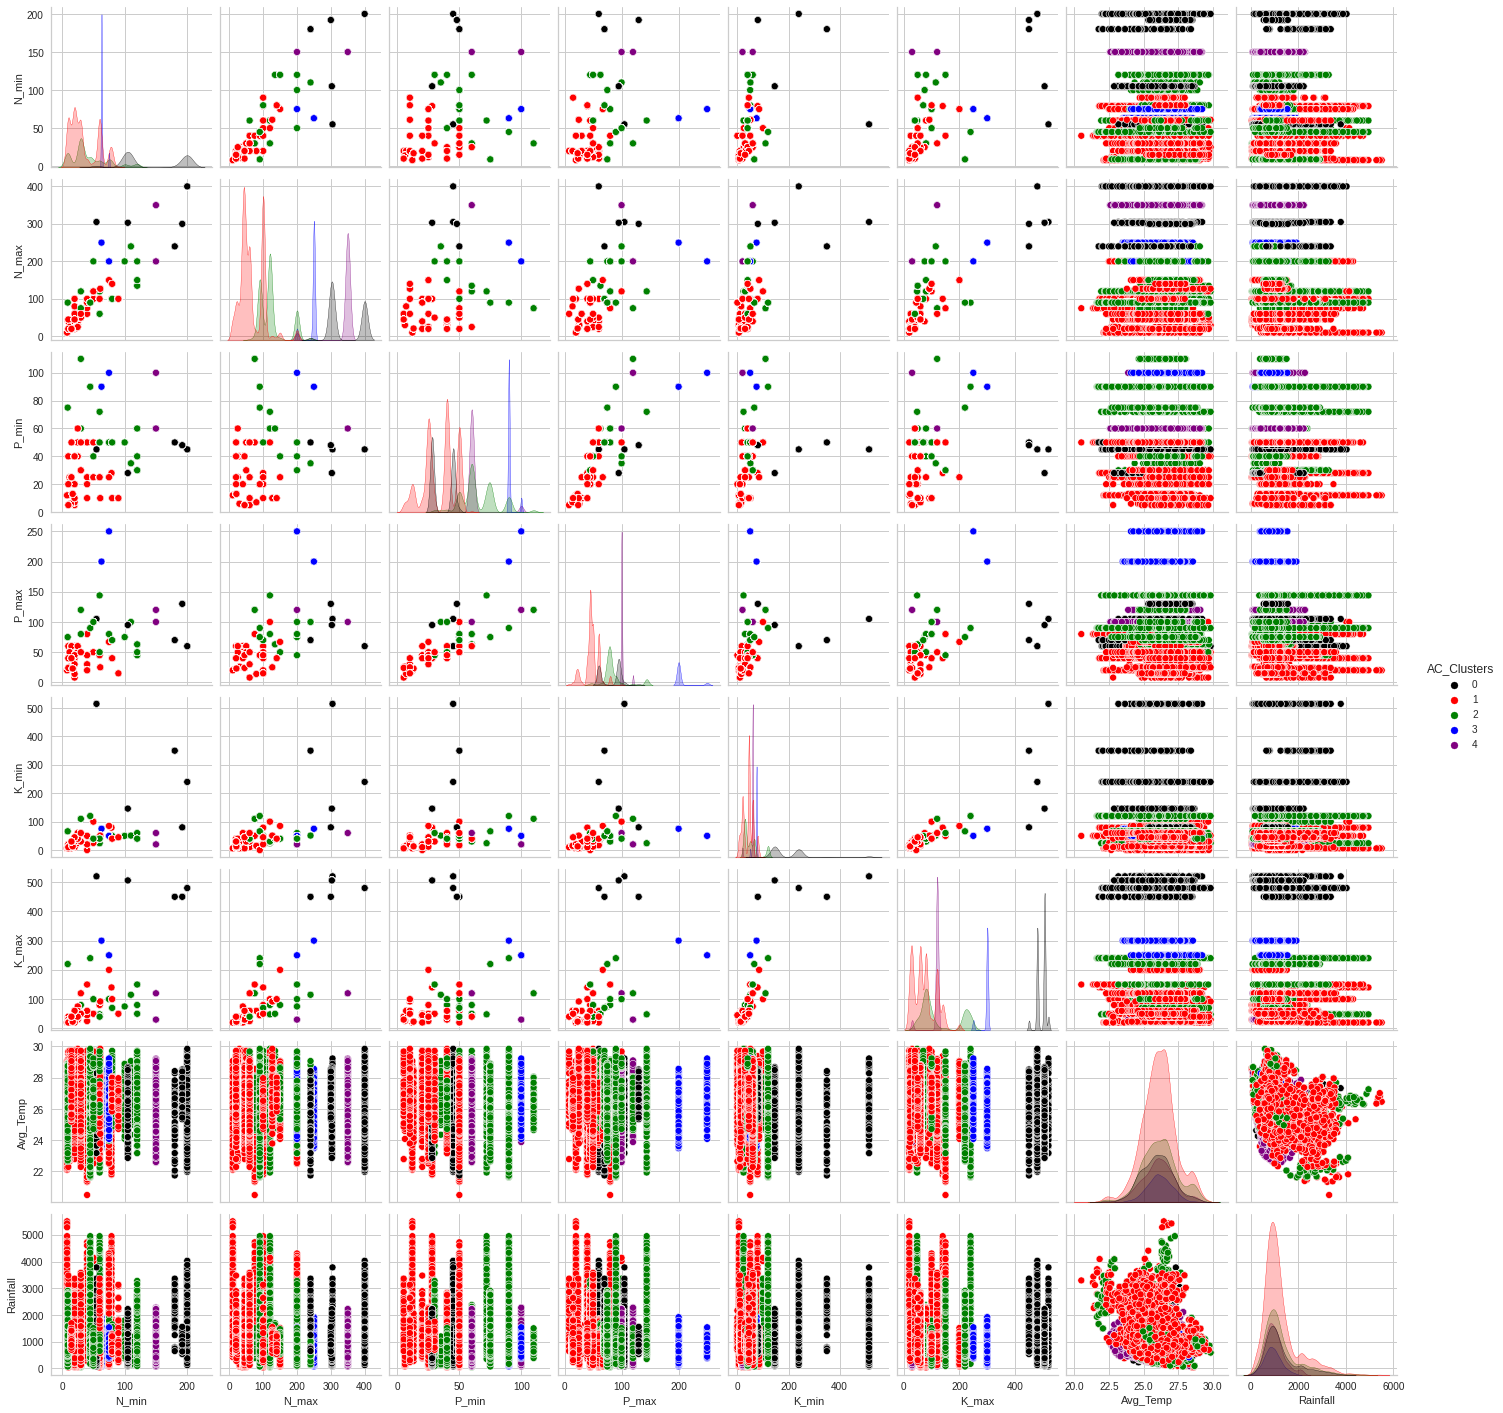

In [ ]:
#Plotting features
To_Plot = ["N_min",	"N_max",	"P_min",	"P_max",	"K_min",	"K_max",	"Avg_Temp",	"Rainfall", "AC_Clusters"]
print("Reletive Plot of All the Features in the AC Clusters without PCA")
plt.figure()
sns.pairplot(AC_data[To_Plot], hue = "AC_Clusters", palette = pallet)
plt.show()

In [ ]:
AC_cluster0_df = AC_data[AC_data["AC_Clusters"] == 0]
AC_cluster1_df = AC_data[AC_data["AC_Clusters"] == 1]
AC_cluster2_df = AC_data[AC_data["AC_Clusters"] == 2]
AC_cluster3_df = AC_data[AC_data["AC_Clusters"] == 3]
AC_cluster4_df = AC_data[AC_data["AC_Clusters"] == 4]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

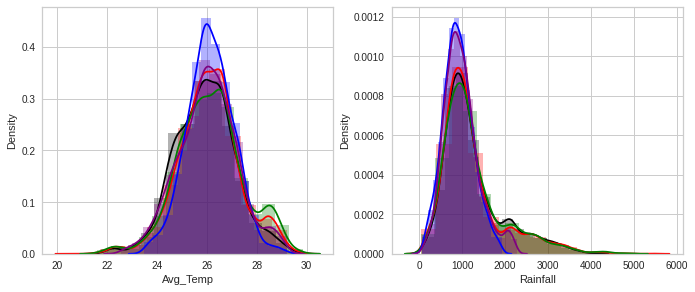

In [ ]:
plt.figure(figsize = (24,10))
plt.subplot(2, 4, 1)
sns.distplot(AC_cluster0_df['Avg_Temp'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster1_df['Avg_Temp'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster2_df['Avg_Temp'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster3_df['Avg_Temp'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster4_df['Avg_Temp'],color="purple",bins=15,hist_kws={'alpha':0.3})

plt.subplot(2, 4, 2)
sns.distplot(AC_cluster0_df['Rainfall'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster1_df['Rainfall'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster2_df['Rainfall'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster3_df['Rainfall'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster4_df['Rainfall'],color="purple",bins=15,hist_kws={'alpha':0.3})

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

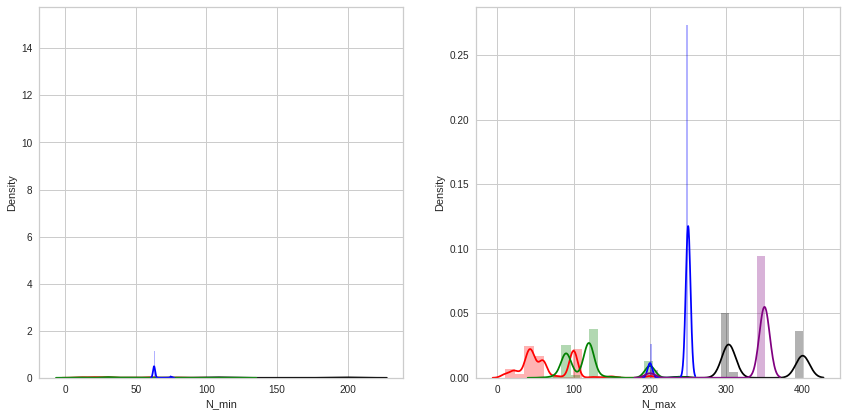

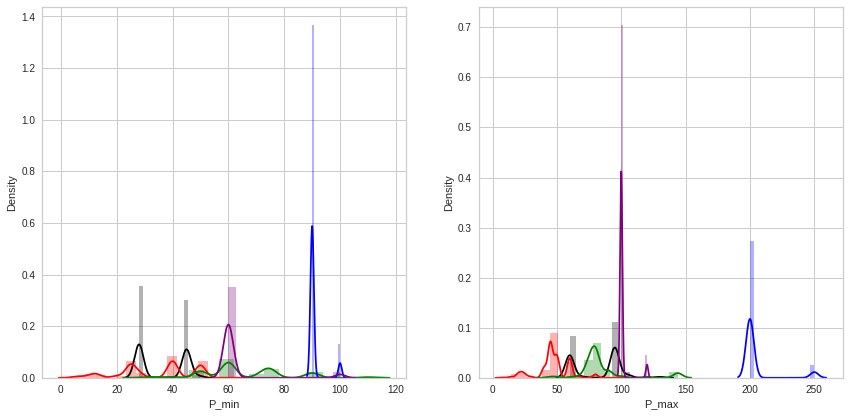

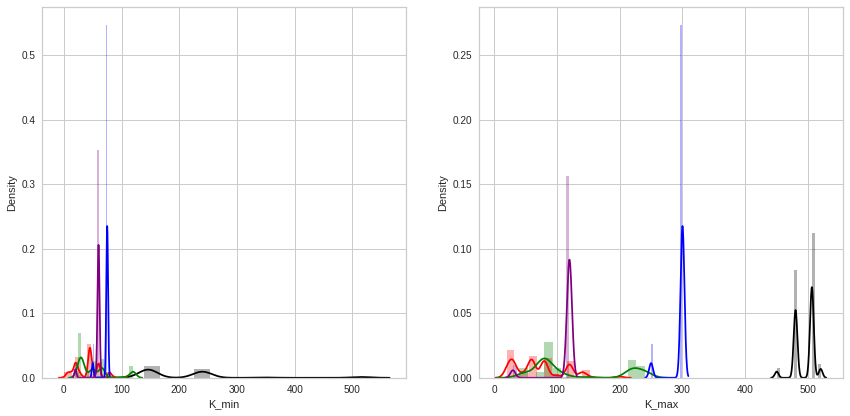

In [ ]:
# N_min / N_max
plt.figure(figsize = (30,15))
plt.subplot(2, 4, 1)
sns.distplot(AC_cluster0_df['N_min'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster1_df['N_min'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster2_df['N_min'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster3_df['N_min'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster4_df['N_min'],color="purple",bins=15,hist_kws={'alpha':0.3})

plt.subplot(2, 4, 2)
sns.distplot(AC_cluster0_df['N_max'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster1_df['N_max'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster2_df['N_max'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster3_df['N_max'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster4_df['N_max'],color="purple",bins=15,hist_kws={'alpha':0.3})

# P_min / P_max
plt.figure(figsize = (30,15))
plt.subplot(2, 4, 1)
sns.distplot(AC_cluster0_df['P_min'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster1_df['P_min'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster2_df['P_min'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster3_df['P_min'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster4_df['P_min'],color="purple",bins=15,hist_kws={'alpha':0.3})

plt.subplot(2, 4, 2)
sns.distplot(AC_cluster0_df['P_max'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster1_df['P_max'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster2_df['P_max'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster3_df['P_max'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster4_df['P_max'],color="purple",bins=15,hist_kws={'alpha':0.3})

# K_min / K_max
plt.figure(figsize = (30,15))
plt.subplot(2, 4, 1)
sns.distplot(AC_cluster0_df['K_min'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster1_df['K_min'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster2_df['K_min'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster3_df['K_min'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster4_df['K_min'],color="purple",bins=15,hist_kws={'alpha':0.3})

plt.subplot(2, 4, 2)
sns.distplot(AC_cluster0_df['K_max'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster1_df['K_max'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster2_df['K_max'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster3_df['K_max'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(AC_cluster4_df['K_max'],color="purple",bins=15,hist_kws={'alpha':0.3})

In [ ]:
count_AC = AC_data.copy()
count_AC = count_AC.drop(columns = ["N_min", "N_max", "P_min", "P_max", "K_min", "K_max", "Avg_Temp", "Rainfall", "Area", "Productivity", "EUR/ha", "EUR/kg", "Production", "Production_kg"])
count_AC["Count"] = 1
count_AC = count_AC.groupby(["Crop", "AC_Clusters"]).sum().reset_index()
count_AC

Crop  AC_Clusters  Count
0                    Arecanut            1    830
1                   Arhar/Tur            1    141
2                       Bajra            1     86
3                      Banana            0   1773
4   Beans & Mutter(Vegetable)            1     84
..                        ...          ...    ...
58                   Turmeric            1   2120
59                       Urad            1     78
60                Water Melon            2     65
61                      Wheat            1     49
62             other oilseeds            1     52

[63 rows x 3 columns]

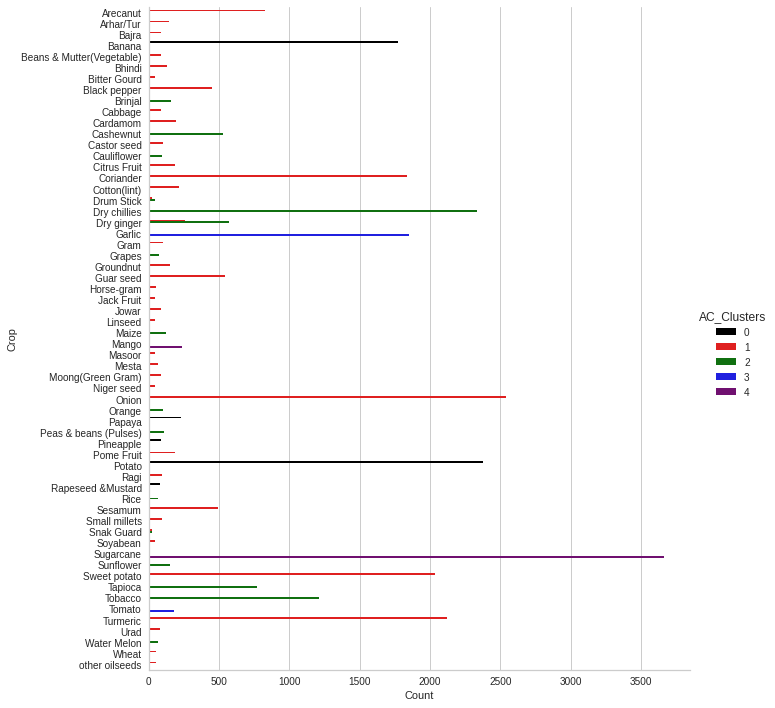

In [ ]:
sns.catplot(data = count_AC, x = "Count", y = "Crop", hue = "AC_Clusters", kind = "bar", height = 10, palette = pallet)

> Same observation done for Agglomerative Clustering with PCA

## KMeans

In [ ]:
KM_data = original_data.copy()
KM_ds = scaled_ds.copy()

In [ ]:
KM = KMeans(n_clusters = n_clusters_elbow, init = 'random')
label_KM = KM.fit_predict(scaled_ds)
KM_data["KM_Clusters"] = label_KM

In [ ]:
KM_data

Crop  N_min  N_max  P_min  P_max  K_min  K_max   Avg_Temp  \
0            Arecanut     79    100     28     40     79    140  28.236667   
1            Arecanut     79    100     28     40     79    140  28.294583   
2            Arecanut     79    100     28     40     79    140  28.545833   
3            Arecanut     79    100     28     40     79    140  28.487500   
4            Arecanut     79    100     28     40     79    140  28.289167   
...               ...    ...    ...    ...    ...    ...    ...        ...   
30627  other oilseeds     90    100     10     15     45     50  27.330417   
30628  other oilseeds     90    100     10     15     45     50  27.190833   
30629  other oilseeds     90    100     10     15     45     50  27.066250   
30630  other oilseeds     90    100     10     15     45     50  27.972083   
30631  other oilseeds     90    100     10     15     45     50  27.165833   

       Rainfall  Productivity        EUR/ha    EUR/kg    Area  Production  \
0       1189.48   2750.000000  14119.607590  5.134403     4.0        11.0   
1        887.11   1750.000000   8985.204830  5.134403     4.0         7.0   
2        788.69   1444.444444   7416.359542  5.134403    18.0        26.0   
3        805.96    722.222222   3708.179771  5.134403    18.0        13.0   
4       1822.37    444.444444   2281.956782  5.134403     9.0         4.0   
...         ...           ...           ...       ...     ...         ...   
30627    815.89    500.000000    855.733794  1.711468  1600.0       800.0   
30628   1323.06    500.000000    855.733794  1.711468   800.0       400.0   
30629   2632.85    500.000000    855.733794  1.711468   200.0       100.0   
30630    575.07    500.000000    855.733794  1.711468   200.0       100.0   
30631    882.21    436.781609    747.537567  1.711468  8700.0      3800.0   

       Production_kg  KM_Clusters  
0            11000.0            0  
1             7000.0            0  
2            26000.0            0  
3            13000.0            0  
4             4000.0            0  
...              ...          ...  
30627       800000.0            0  
30628       400000.0            0  
30629       100000.0            0  
30630       100000.0            0  
30631      3800000.0            0  

[30632 rows x 16 columns]

In [ ]:
KM_data.describe()

N_min         N_max         P_min         P_max         K_min  \
count  30632.000000  30632.000000  30632.000000  30632.000000  30632.000000   
mean      69.079068    165.353846     48.279479     77.556934     71.689247   
std       55.556031    122.934628     21.572683     42.334731     68.540825   
min        8.000000     10.000000      5.000000      8.000000      0.000000   
25%       25.000000     60.000000     28.000000     45.000000     30.000000   
50%       60.000000    100.000000     50.000000     67.000000     60.000000   
75%      105.000000    303.000000     60.000000     95.000000     75.000000   
max      200.000000    400.000000    110.000000    250.000000    515.000000   

              K_max      Avg_Temp      Rainfall  Productivity        EUR/ha  \
count  30632.000000  30632.000000  30632.000000  3.063200e+04  3.063200e+04   
mean     166.556052     26.084822   1178.790085  3.698977e+04  1.004369e+04   
std      153.449917      1.233055    681.794662  1.351138e+06  2.467437e+05   
min       20.000000     20.491667     34.240000  0.000000e+00  0.000000e+00   
25%       60.000000     25.315521    755.730000  7.500000e+02  1.140978e+03   
50%      120.000000     26.077500   1013.600000  2.750000e+03  2.738348e+03   
75%      220.000000     26.800833   1357.330000  1.300000e+04  6.884147e+03   
max      520.000000     29.852083   5505.020000  8.800000e+07  1.606498e+07   

             EUR/kg           Area    Production  Production_kg   KM_Clusters  
count  30632.000000   30632.000000  3.063200e+04   3.063200e+04  30632.000000  
mean       1.679121    4532.816793  9.857387e+04   9.857387e+07      1.328839  
std        2.613743   22580.340784  7.616118e+05   7.616118e+08      1.386713  
min        0.182557       1.000000  0.000000e+00   0.000000e+00      0.000000  
25%        0.228196      41.000000  6.400000e+01   6.400000e+04      0.000000  
50%        0.855734     256.000000  6.600000e+02   6.600000e+05      1.000000  
75%        1.825565    1574.000000  8.755750e+03   8.755750e+06      3.000000  
max       17.114676  884618.000000  3.715800e+07   3.715800e+10      4.000000

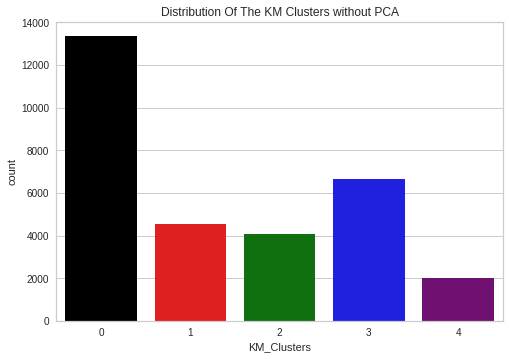

In [ ]:
#Plotting countplot of clusters
pallet = ["black", "red", "green", "blue", "purple"]
pl = sns.countplot(x = KM_data["KM_Clusters"], palette = pallet)
pl.set_title("Distribution Of The KM Clusters without PCA")
plt.show()

In [ ]:
km_clusters_distribution = KM_data["KM_Clusters"].value_counts()
print("The distribution for each KM cluster without PCA is:\n{}".format(km_clusters_distribution))

The distribution for each KM cluster without PCA is:
0    13353
3     6631
1     4542
2     4077
4     2029
Name: KM_Clusters, dtype: int64


Reletive Plot of All the Features in the KM Clusters without PCA


<Figure size 576x396 with 0 Axes>

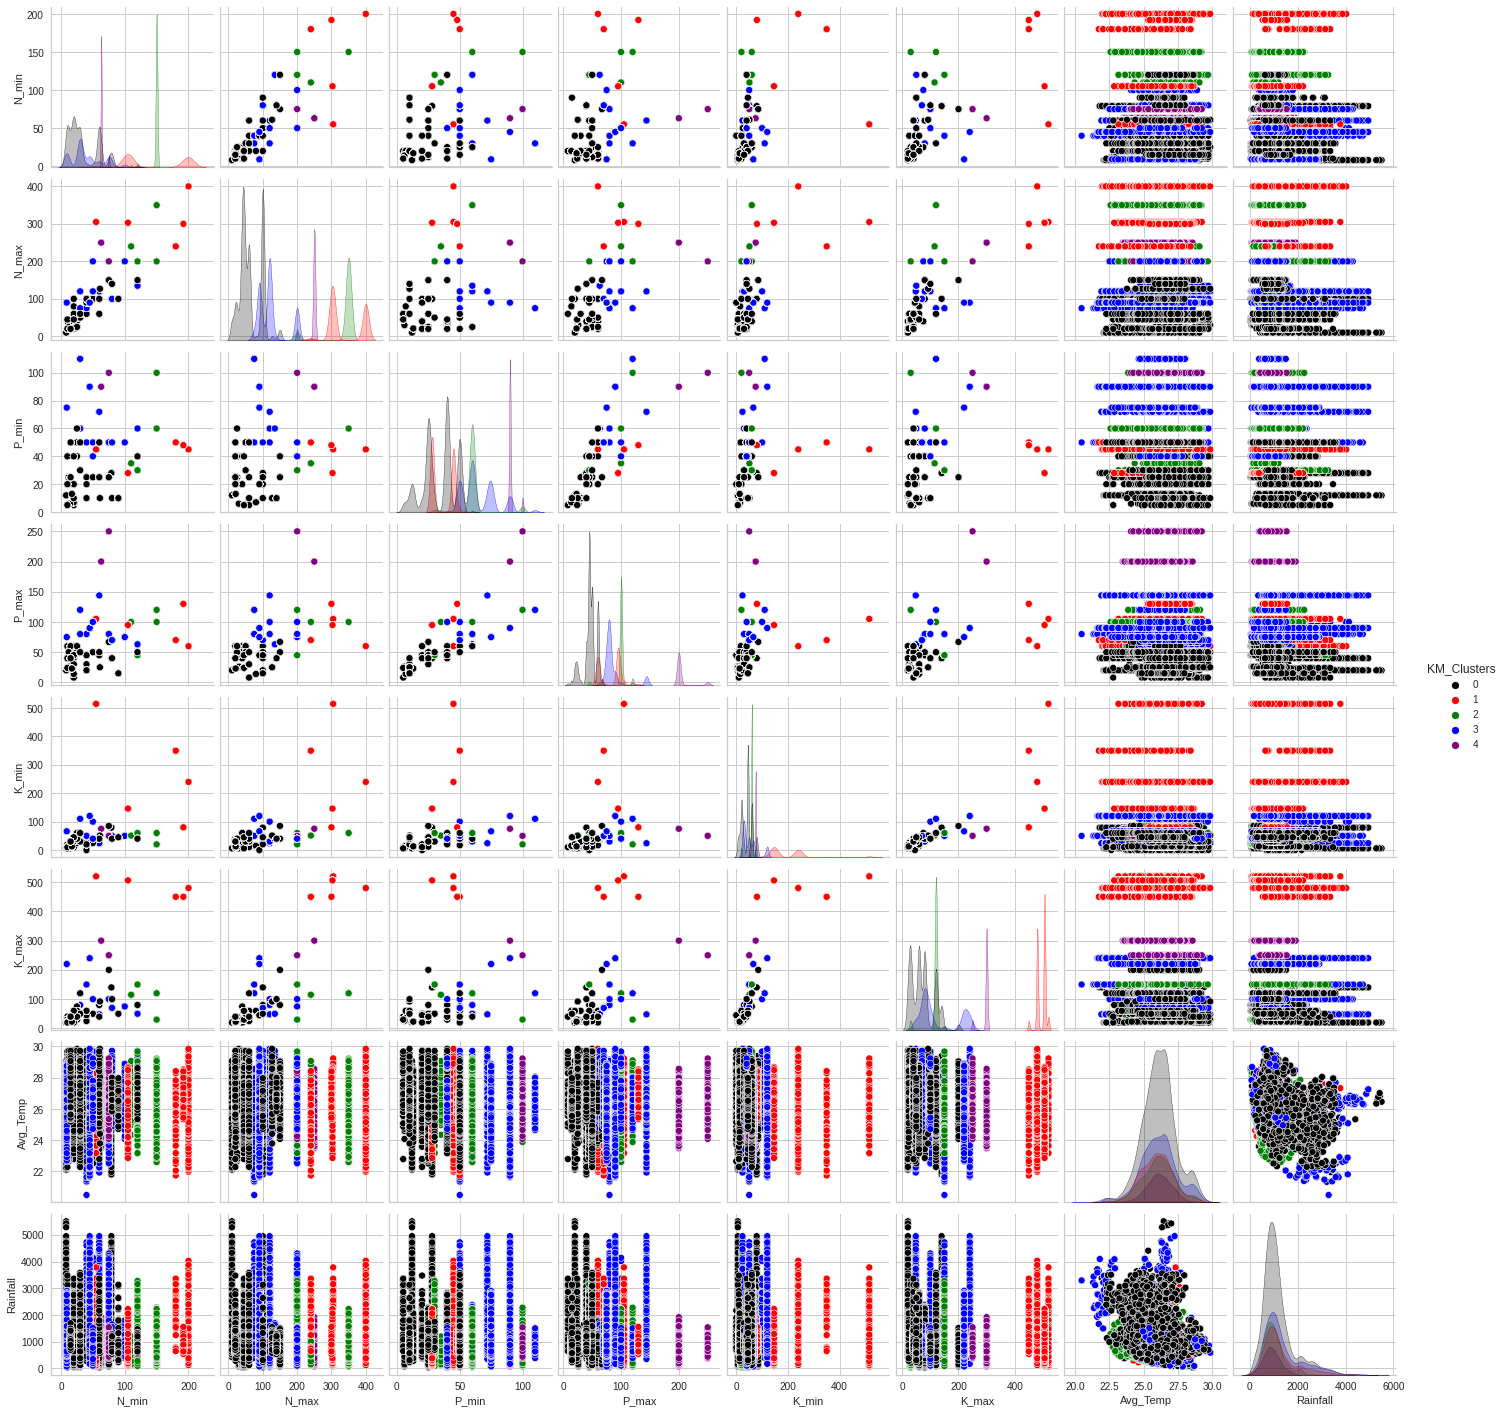

In [ ]:
#Plotting features
To_Plot = ["N_min",	"N_max",	"P_min",	"P_max",	"K_min",	"K_max",	"Avg_Temp",	"Rainfall", "KM_Clusters"]
print("Reletive Plot of All the Features in the KM Clusters without PCA")
plt.figure()
sns.pairplot(KM_data[To_Plot], hue = "KM_Clusters", palette = pallet)
plt.show()

In [ ]:
KM_cluster0_df = KM_data[KM_data["KM_Clusters"] == 0]
KM_cluster1_df = KM_data[KM_data["KM_Clusters"] == 1]
KM_cluster2_df = KM_data[KM_data["KM_Clusters"] == 2]
KM_cluster3_df = KM_data[KM_data["KM_Clusters"] == 3]
KM_cluster4_df = KM_data[KM_data["KM_Clusters"] == 4]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

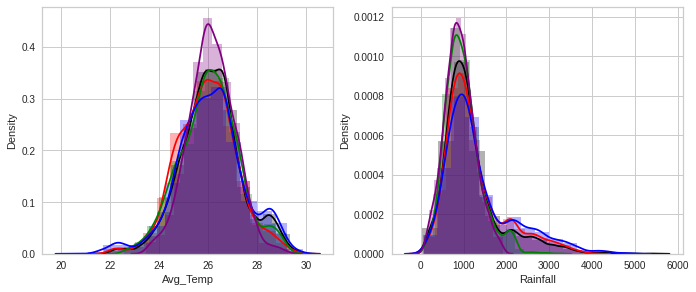

In [ ]:
plt.figure(figsize = (24,10))
plt.subplot(2, 4, 1)
sns.distplot(KM_cluster0_df['Avg_Temp'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster1_df['Avg_Temp'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster2_df['Avg_Temp'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster3_df['Avg_Temp'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster4_df['Avg_Temp'],color="purple",bins=15,hist_kws={'alpha':0.3})

plt.subplot(2, 4, 2)
sns.distplot(KM_cluster0_df['Rainfall'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster1_df['Rainfall'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster2_df['Rainfall'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster3_df['Rainfall'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster4_df['Rainfall'],color="purple",bins=15,hist_kws={'alpha':0.3})

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

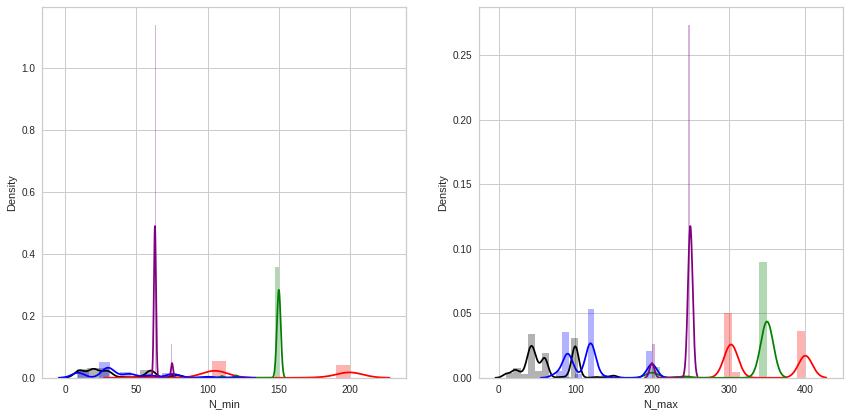

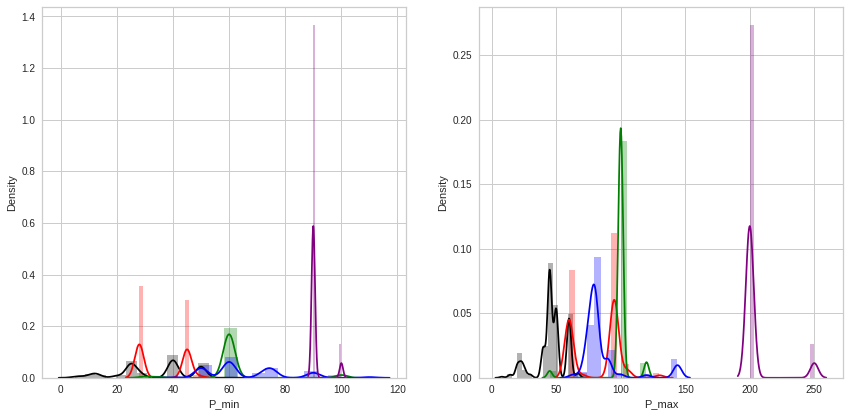

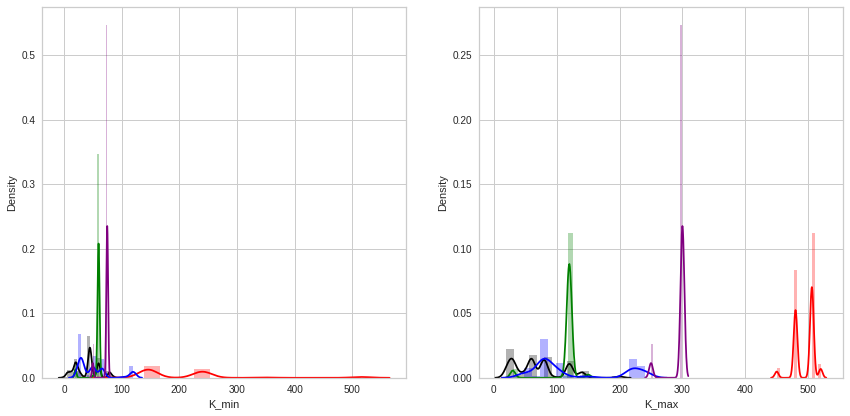

In [ ]:
# N_min / N_max
plt.figure(figsize = (30,15))
plt.subplot(2, 4, 1)
sns.distplot(KM_cluster0_df['N_min'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster1_df['N_min'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster2_df['N_min'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster3_df['N_min'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster4_df['N_min'],color="purple",bins=15,hist_kws={'alpha':0.3})

plt.subplot(2, 4, 2)
sns.distplot(KM_cluster0_df['N_max'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster1_df['N_max'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster2_df['N_max'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster3_df['N_max'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster4_df['N_max'],color="purple",bins=15,hist_kws={'alpha':0.3})

# P_min / P_max
plt.figure(figsize = (30,15))
plt.subplot(2, 4, 1)
sns.distplot(KM_cluster0_df['P_min'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster1_df['P_min'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster2_df['P_min'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster3_df['P_min'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster4_df['P_min'],color="purple",bins=15,hist_kws={'alpha':0.3})

plt.subplot(2, 4, 2)
sns.distplot(KM_cluster0_df['P_max'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster1_df['P_max'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster2_df['P_max'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster3_df['P_max'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster4_df['P_max'],color="purple",bins=15,hist_kws={'alpha':0.3})

# K_min / K_max
plt.figure(figsize = (30,15))
plt.subplot(2, 4, 1)
sns.distplot(KM_cluster0_df['K_min'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster1_df['K_min'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster2_df['K_min'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster3_df['K_min'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster4_df['K_min'],color="purple",bins=15,hist_kws={'alpha':0.3})

plt.subplot(2, 4, 2)
sns.distplot(KM_cluster0_df['K_max'],color="black",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster1_df['K_max'],color="red",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster2_df['K_max'],color="green",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster3_df['K_max'],color="blue",bins=15,hist_kws={'alpha':0.3})
sns.distplot(KM_cluster4_df['K_max'],color="purple",bins=15,hist_kws={'alpha':0.3})

In [ ]:
count_KM = KM_data.copy()
count_KM = count_KM.drop(columns = ["N_min", "N_max", "P_min", "P_max", "K_min", "K_max", "Avg_Temp", "Rainfall", "Area", "Productivity", "EUR/ha", "EUR/kg", "Production", "Production_kg"])
count_KM["Count"] = 1
count_KM = count_KM.groupby(["Crop", "KM_Clusters"]).sum().reset_index()
count_KM

Crop  KM_Clusters  Count
0                    Arecanut            0    830
1                   Arhar/Tur            0    141
2                       Bajra            0     86
3                      Banana            1   1773
4   Beans & Mutter(Vegetable)            0     84
5                      Bhindi            0    128
6                Bitter Gourd            0     47
7                Black pepper            0    453
8                     Brinjal            3    157
9                     Cabbage            0     87
10                   Cardamom            3    194
11                  Cashewnut            3    526
12                Castor seed            0    101
13                Cauliflower            3     94
14               Citrus Fruit            0    184
15                  Coriander            0   1835
16               Cotton(lint)            0    212
17                 Drum Stick            3     70
18               Dry chillies            3   2330
19                 Dry ginger            3    831
20                     Garlic            4   1850
21                       Gram            0    103
22                     Grapes            2     75
23                  Groundnut            0    148
24                  Guar seed            0    539
25                 Horse-gram            0     55
26                 Jack Fruit            0     48
27                      Jowar            0     88
28                    Linseed            0     48
29                      Maize            3    123
30                      Mango            2    234
31                     Masoor            0     42
32                      Mesta            0     66
33          Moong(Green Gram)            0     87
34                 Niger seed            0     45
35                      Onion            0   2538
36                     Orange            2    103
37                     Papaya            1    232
38      Peas & beans (Pulses)            3    109
39                  Pineapple            1     86
40                 Pome Fruit            0    189
41                     Potato            1   2374
42                       Ragi            0     93
43          Rapeseed &Mustard            1     77
44                       Rice            0     66
45                    Sesamum            0    491
46              Small millets            0     98
47                 Snak Guard            0     46
48                   Soyabean            0     42
49                  Sugarcane            2   3665
50                  Sunflower            3    150
51               Sweet potato            0   2034
52                    Tapioca            3    769
53                    Tobacco            3   1213
54                     Tomato            4    179
55                   Turmeric            0   2120
56                       Urad            0     78
57                Water Melon            3     65
58                      Wheat            0     49
59             other oilseeds            0     52

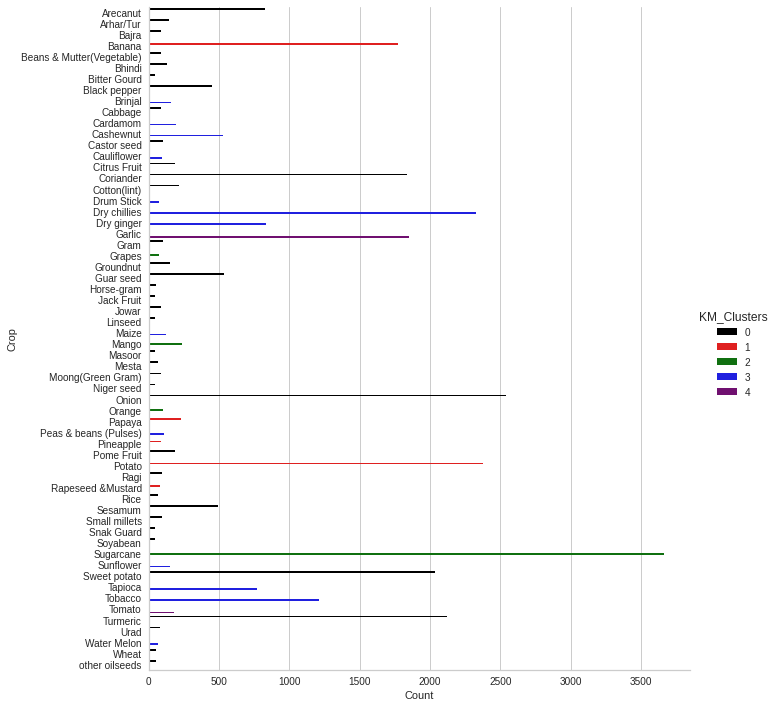

In [ ]:
sns.catplot(data = count_KM, x = "Count", y = "Crop", hue = "KM_Clusters", kind = "bar", height = 10, palette = pallet)

> Same reasoning for KMeans with PCA